# Daily Price Prediction with Network Features 

## NSGA-II - A Multiobjective Evolutionary Algorithm

Nondominated Sorting Genetic Algorithm II is an elitist, multiobjective evolutionary algorithm which overcomes the common problems of nondominated sorting evolutionary algorithms: computational complexity, nonelitist approach, reliance on the concept of sharing, thus requiring an extra parameter. Since we are trying to generate a high quality feature set, it is important to design our feature selection process to minimise the number of features while maximising the predictive power of our model. Minimising the feature set is necessary to reduce the variance of our model, thus reducing the probability of overfitting while the need to maximise predictive power is self-explanatory. It is clear that we need to solve a multi-objective optimisation problem. As it was shown by Siedlecki and Sklansky that genetic algorithms are successful at large scale feature selection and due to the nature of our optimisation problem, NSGA-II can be considered as a good candidate for this problem.

## Multiple Linear Regression

Madan et al. achieved remarkable daily price prediction results with a simple linear classifier, using Bitcoin network features exclusively. Their binomial generalised linear model produced a spectacular accuracy score of 98.7%. It is difficult not to be sceptical when encountering such stellar results. Hence, we decided to further investigate this problem.
When conducting machine learning research, it is usually a good idea to start with simpler models first. For this reason and because of insightfulness, we opted to choose an ordinary least squares multiple linear regression model for analysis.

## Feature Selection

The following 22 features were downloaded from blockchain.info:

miners-revenue

cost-per-transaction

transaction-fees-usd

network-deficit

n-transactions

n-transactions-excluding-popular

n-transactions-excluding-chains-longer-than-10

n-transactions-excluding-chains-longer-than-100

n-transactions-excluding-chains-longer-than-1000

n-transactions-excluding-chains-longer-than-10000

n-unique-addresses

n-transactions-per-block

n-orphaned-blocks

output-volume

estimated-transaction-volume-usd

trade-volume

tx-trade-ratio

hash-rate

difficulty

median-confirmation-time

bitcoin-days-destroyed

avg-block-size

Siedlecki and Sklansky demonstrated that genetic algorithms perform well on large scale feature selection problems. They used feature sets where the number of features exceeded 20.  Hence, our problem is a good candidate for the GA approach. The reasons behind the limit 20 is discussed in their paper. 

In addition to running the GA multiple times with different parameters, we visualized the features compared to the market price on regression plots in order to manually assist the feature selection. Since GAs won't necessarily find the best possible subset of features due to their nature, some manual intervention is a good idea. Furthermore, the relevance of the selected features and the model's predictive capability were verified by creating residual plots. 

## Data Splitting

The collected daily data ranges from January 4, 2012 to April 13, 2016 which results in ~1500 data points. The model is trained on 70% of the data. The remaining 30% is then halved. The first half is used in the GA feature selection for validation, while the last 15% is reserved for testing the model. 

## Metrics

**R<sup>2</sup> - Goodnes-of-Fit**

R<sup>2</sup> (or Coefficient of Determination) is a commonly used metric when evaluating regression models which indicates how well the regression line approximates the given data. Although its value is usually in the range of [0,1], where 1 indicates a perfect fit, the score can end up being negative. One problem with R<sup>2</sup> is that it does not filter out irrelevant features. One can add new, meaningless variables to the model while increasing its R<sup>2</sup> score. Also this metric could potentially over-, under-predict the data, thus other metrics should be used in conjuction.
The R<sup>2</sup> statistic calculates the ratio between the residual and total sum-of-squares subtracted from 1:

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i = 0}^{n - 1} (y_i - \hat{y}_i)^2}{\sum_{i = 0}^{n - 1}(y_i - \bar{y})^2}$$

where y are the actual output values and $\hat{y}$ are the predicted output values. 

**Root-Mean-Square Error**

RMSE is a good metric for numerical predictions which indicates the sample standard deviation between the observed and predicted data. It is usually a preferable metric over both the Mean Absolute Error and the Mean-Square error because RMSE penalizes larger errors more than the MAE, which is crucial to good price prediction, while it is easier to interpret than the MSE due to having the same dimensions as the predicted values ($\hat{y}$).
$$ RMSE(y, \hat{y}) = \sqrt{\frac{\sum_{i = 0}^{n - 1}(y_i - \hat{y}_i)^2}{n}} $$

**Mean Absolute Error**

As mentioned before, RMSE is usually the preferred regression metric over MAE, due to penalizing large errors. However, MAE is worth considering in cases of noisy data. We do not want to penalize large errors that are irrelevant. For instance, during Winton Capital's stock price prediction Kaggle competition, MAE was a more fitting error metric for that problem compared to the RMSE. 
MAE is calculated as follows:

$$ MAE(y, \hat{y}) = \frac{\sum_{i = 0}^{n - 1}|y_i - \hat{y}_i|}{n}$$


**Directional Symmetry**

Since our ultimate goal is to devise profitable trading strategies based on our prediction models, it is necessary to include a metric which measures prediction power in terms of sign change accuracy. One might end up with remarkable RMSE and MAE scores for the predicted prices while the model is unable to predict the correct direction of the price movements, ultimately rendering it incapable of making good trading decisions. We opted to use directional symmetry for this purpose, which is a widely used metric score for calssifying price changes. Its original formula relies on using the actual prices to calculate the score:
$$ DS(y, \hat{y}) = \frac{100}{n - 1} \sum_{i = 2}^n d_i$$

$$
d_i =
  \begin{cases}
    1, & \quad \text{if }(y_i - y_{i - 1})(\hat{y}_i - \hat{y}_{i - 1}) \geq 0 \\
    0, & \quad \text{otherwise}\\
  \end{cases}
$$

However, in cases when we are predicting price changes, we will use a formula 
that relies on these price change values rather than the actual prices: 

$$ DS(y, \hat{y}) = \frac{100}{n} \sum_{i = 1}^n d_i$$

$$
d_i =
  \begin{cases}
    1, & \quad \text{if } sgn(y_i * \hat{y}_i)\geq 0 \\
    0, & \quad \text{otherwise}\\
  \end{cases}
$$

## Results

As mentioned before, due to the nature of EAs, one cannot be sure that the extracted features are the most meaningful ones. Hence, it is a good idea to run the EA several times and use some intuition to improve the quality of the feature set. 
After revising our approach and selecting the feature set more carefully, the following features were selected by the GA most commonly: **miners-revenue**, **network-deficit**, **cost-per-transaction**, **output-volume**, **estimated-transaction-volume-usd**, **tx-trade-ratio** and **trade-volume**. Observing the regression plots, the **network-deficit** and **miners-revenue** shows high collinearity with the market price. Using these features, we end up with R2: 0.625977721, RMSE: 47.549666269, MAE: 35.556726415, Sign change accuracy:  53.2188841202. We were experimenting with this feature set by removing certain variables and using different combinations but the prediction power of the model remained roughly the same. The most notable change occured when we removed **tx-trade-ratio**, resulting in R2: 0.771213976, RMSE: 37.188912801, MAE: 28.233852304, Sign change accuracy:  51.0729613734. We also tried replacing the **tx-trade-ratio** with its components by adding **n-transactions** to the feature set and keeping **trade-volume** (recall the **tx-trade-ratio** is the ratio between **n-transactions** and **trade-volume**), however this greatly reduced the prediction power of our model. Analyising the residual plots, we did not discover any anomalies, apart from an unbalanced x-axis in the cases of **output-volume** and **trade-volume** but these did not hurt the model. On the contrary, when we excluded them the model's prediction performance decreased. All the other residual plots show symmetrically distributed values around the middle, except maybe the residual plot of **tx-trade-ratio**. There are no signs of heteroscedasticity or any clear patterns that would indicate a nonlinear relationship. According to our feature set, trading activity and mining related prices are the main factors that might influence the price of bitcoin. Our conclusion is consistent with the findings of Greaves and Au. 
Regarding the results of Madan et al., we are quite certain that their Binomial GLM model is suffering from "time travelling bias". Although we did not reproduce their results due to lack of information about their model, but according to their phrasings, we think that they used features from the same day rather than the previous one when they were conducting "price predictions". When we replicated this scenario with our multiple linear regression model, we could achieve remarkable results too. It is worth noting, that their model actually suffered some performance decrease since they used all of their features. By only using the **market-cap** as an input feature, one could achieve a 100% classification accuracy. But then again, this whole scenario is unrealistic. It is impossible to know the actual market capitalisation before the actual price. Also in this scenario, there is no need for learning once we have the value of the market capitalisation. A simple calculator would suffice... And a time machine to obtain the actual value. 

# References

* http://www.sciencedirect.com/science/article/pii/0167865589900378
* http://sci2s.ugr.es/sites/default/files/files/Teaching/OtherPostGraduateCourses/MasterEstructuras/bibliografia/Deb_NSGAII.pdf
* http://cs229.stanford.edu/proj2014/Isaac%20Madan,%20Shaurya%20Saluja,%20Aojia%20Zhao,Automated%20Bitcoin%20Trading%20via%20Machine%20Learning%20Algorithms.pdf
* https://www.kaggle.com/c/the-winton-stock-market-challenge
* https://web.stanford.edu/class/cs224w/projects_2015/Using_the_Bitcoin_Transaction_Graph_to_Predict_the_Price_of_Bitcoin.pdf

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information deap, matplotlib, numpy, pandas, seaborn, sklearn

Software versions
Python 3.5.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.1.2
OS Linux 3.13.0 86 generic x86_64 with debian jessie sid
deap 1.0
matplotlib 1.5.1
numpy 1.10.4
pandas 0.18.0
seaborn 0.7.0
sklearn 0.17.1
Fri May 27 22:48:56 2016 BST

In [4]:
from deap import base, creator, tools, algorithms
from IPython.display import display
from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn import preprocessing as preproc, datasets, linear_model
from sklearn.metrics import mean_squared_error as mse, accuracy_score as acc_scr, mean_absolute_error as mae

np.set_printoptions(threshold=np.nan)
sns.set()
toolb = base.Toolbox()

In [21]:
# Note: chart names could occasionally change on blockchain.info
URL = 'https://blockchain.info/charts/%s?timespan=all&format=csv'
CHARTS = ['market-price',
          'miners-revenue',
          'cost-per-transaction',
          'transaction-fees-usd',
          'network-deficit', 
          'n-transactions', 
          'n-transactions-excluding-popular',
          'n-transactions-excluding-chains-longer-than-10',
          'n-transactions-excluding-chains-longer-than-100',
          'n-transactions-excluding-chains-longer-than-1000',
          'n-transactions-excluding-chains-longer-than-10000',
          'n-unique-addresses', 
          'n-transactions-per-block',
          'n-orphaned-blocks',
          'output-volume',
          'estimated-transaction-volume-usd',
          'trade-volume',
          'tx-trade-ratio',
          'hash-rate',
          'difficulty',
          'median-confirmation-time',
          'bitcoin-days-destroyed',
          'avg-block-size'
         ]

FRAMES = []   # contains everything as DataFrames from charts
FEATURES = [] # standardized DataFrames from charts, excluding market-price

date_parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

def prep_data(date_from, date_to):
    del FRAMES[:]
    del FEATURES[:]

    # Create DataFrame from the market-price
    data = pd.read_csv(URL % CHARTS[0], parse_dates=[0], date_parser = date_parse)
    data.columns = ['date', CHARTS[0]]
    
    df = pd.DataFrame(data)
    df['date'] = df['date'].apply(lambda x: x.date())
    df = df.drop_duplicates(['date']).set_index('date').reindex(pd.date_range(start = date_from, end = date_to))
    FRAMES.append(df)

    for chart in CHARTS[1:]:
        data = pd.read_csv(URL % chart, parse_dates=[0], date_parser = date_parse)
        data.columns = ['date', chart]
    
        df = pd.DataFrame(data)
        df['date'] = df['date'].apply(lambda x: x.date())
        df = df.drop_duplicates(['date']).set_index('date').reindex(pd.date_range(start = date_from, end = date_to))
        FRAMES.append(df)

        # Standardize the values inside the DataFrame
        data_np = df.as_matrix()
        scaler = preproc.StandardScaler().fit(data_np[:int(0.7*len(data_np))])
        data_np_standard = scaler.transform(data_np)

        # Create a new DataFrame from the standardized values
        df_standard = pd.DataFrame(data=data_np_standard, index=df.index, columns=df.columns)
        FEATURES.append(df_standard)

# Data pre-processing

In [22]:
widgets.interact(prep_data, date_from = '1/4/2012', date_to = '4/13/2016')

<function __main__.prep_data>

# Regression plots

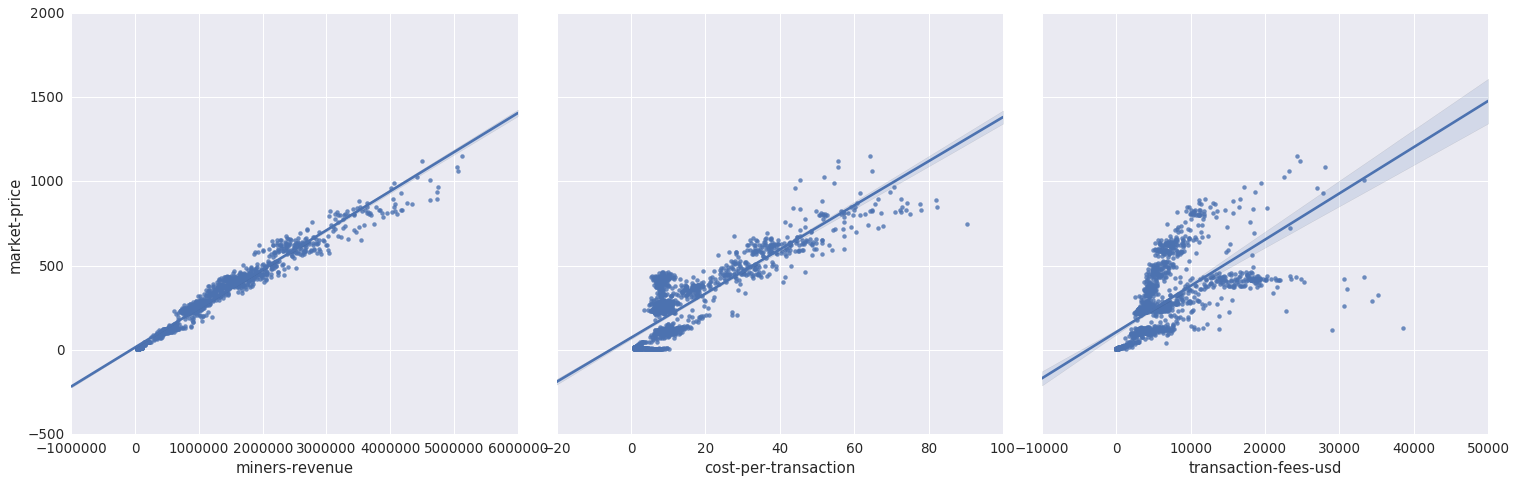

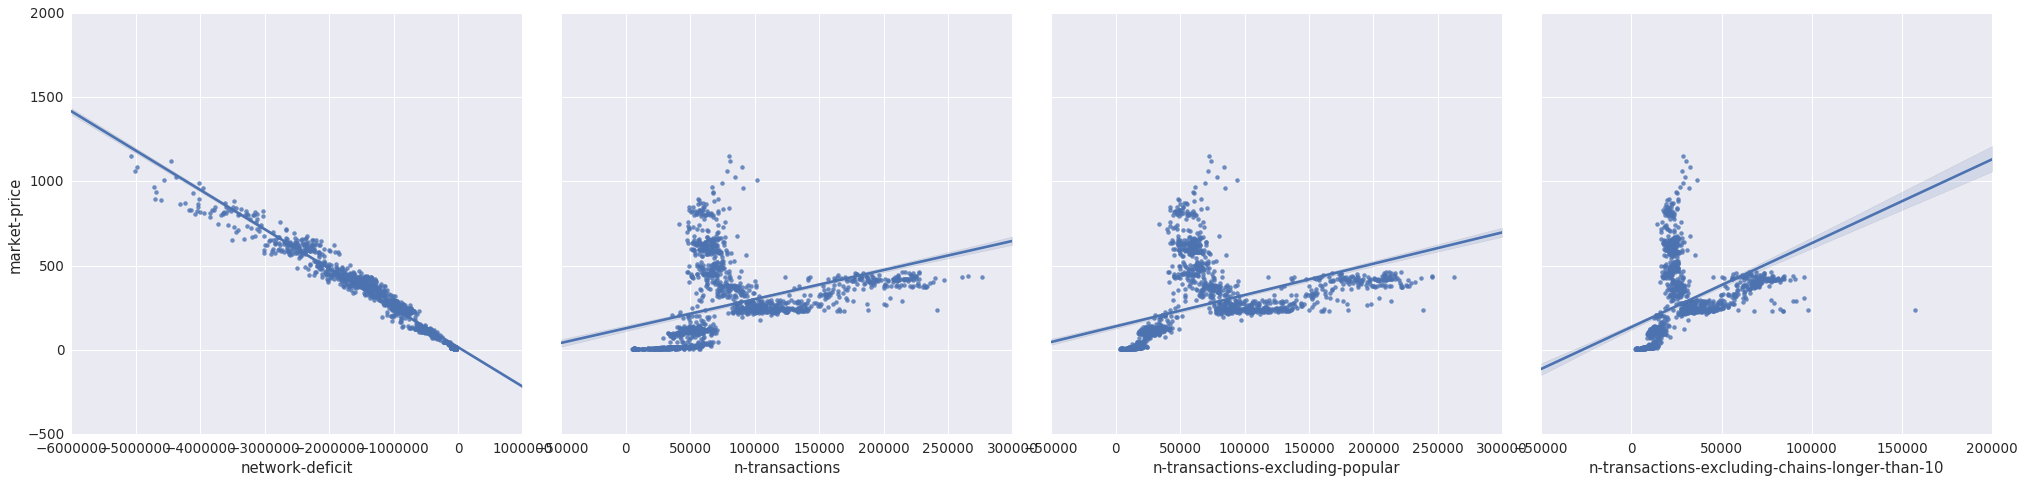

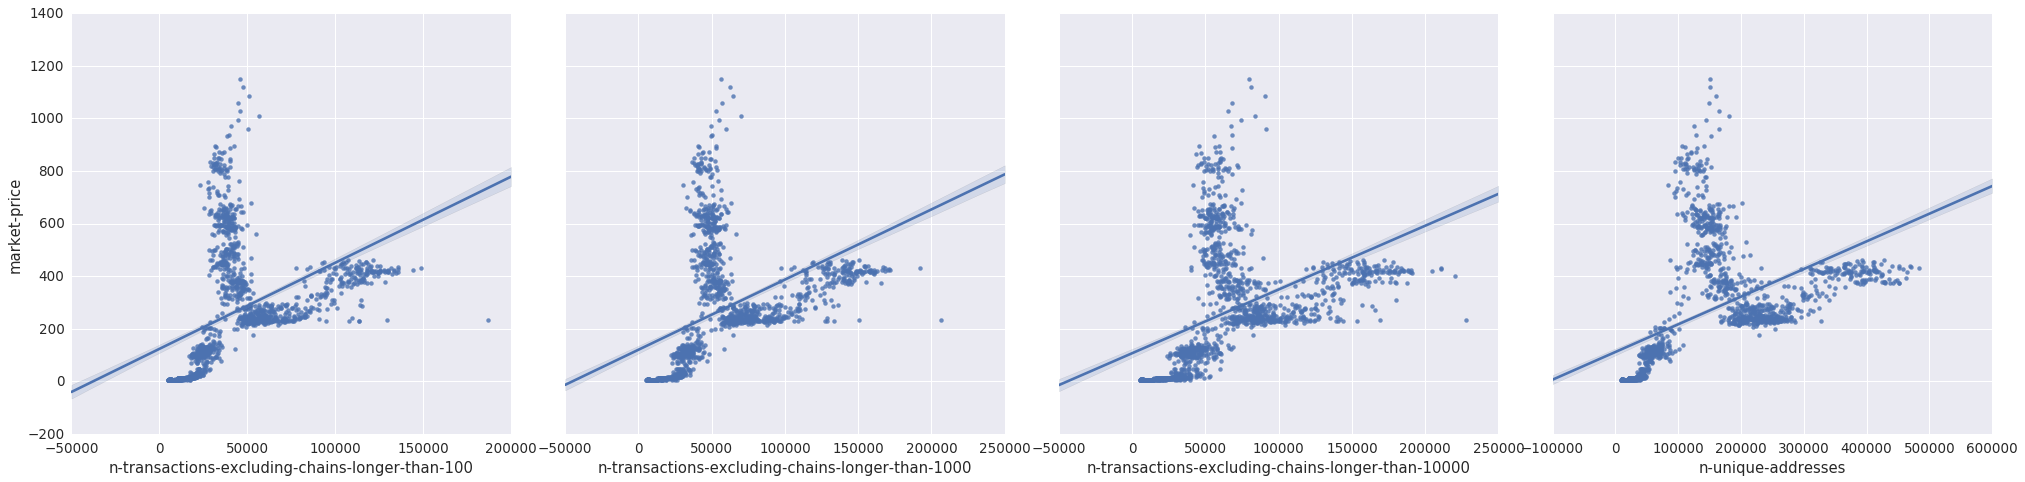

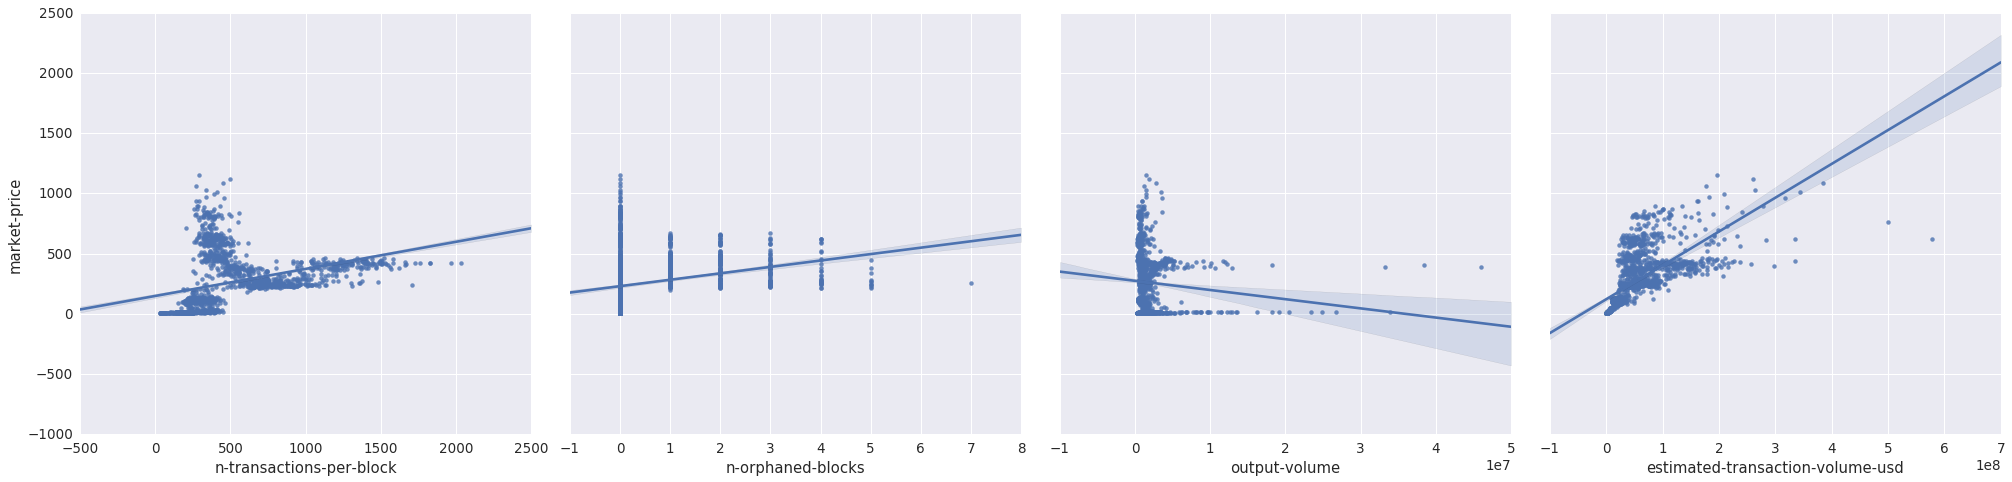

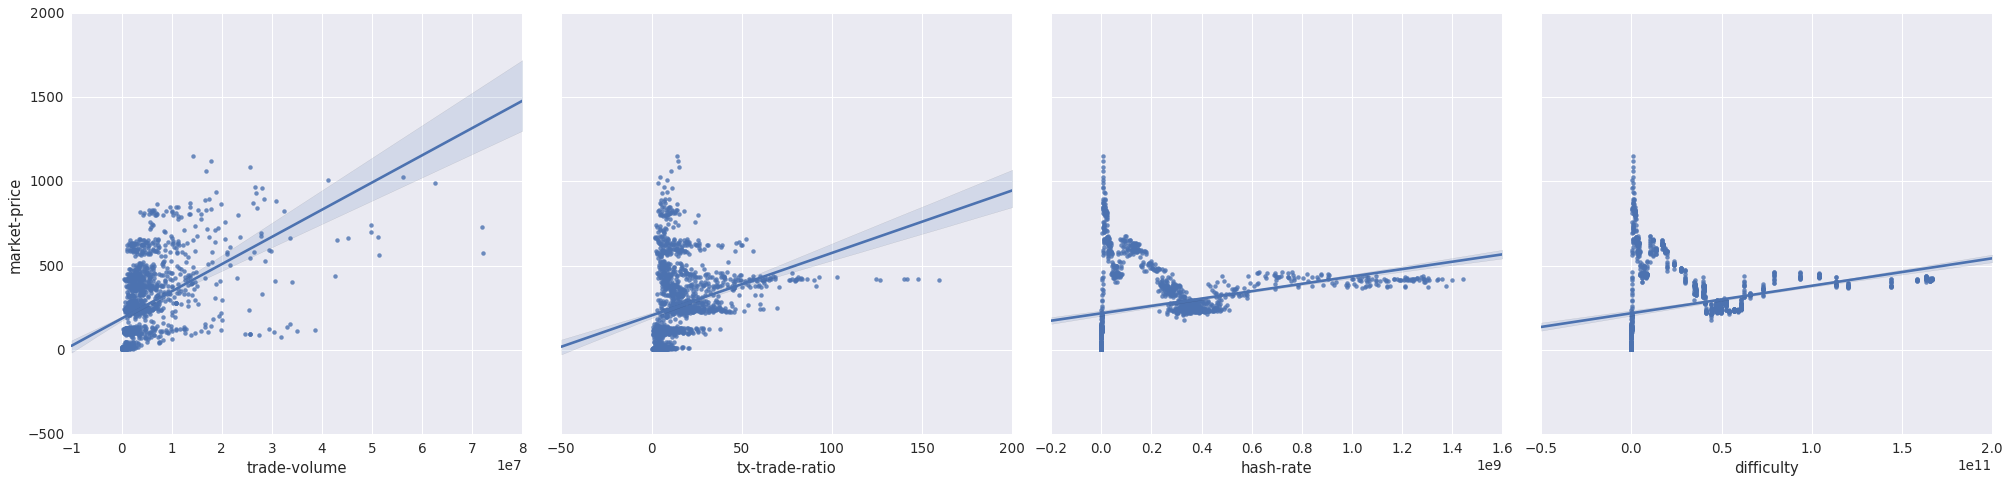

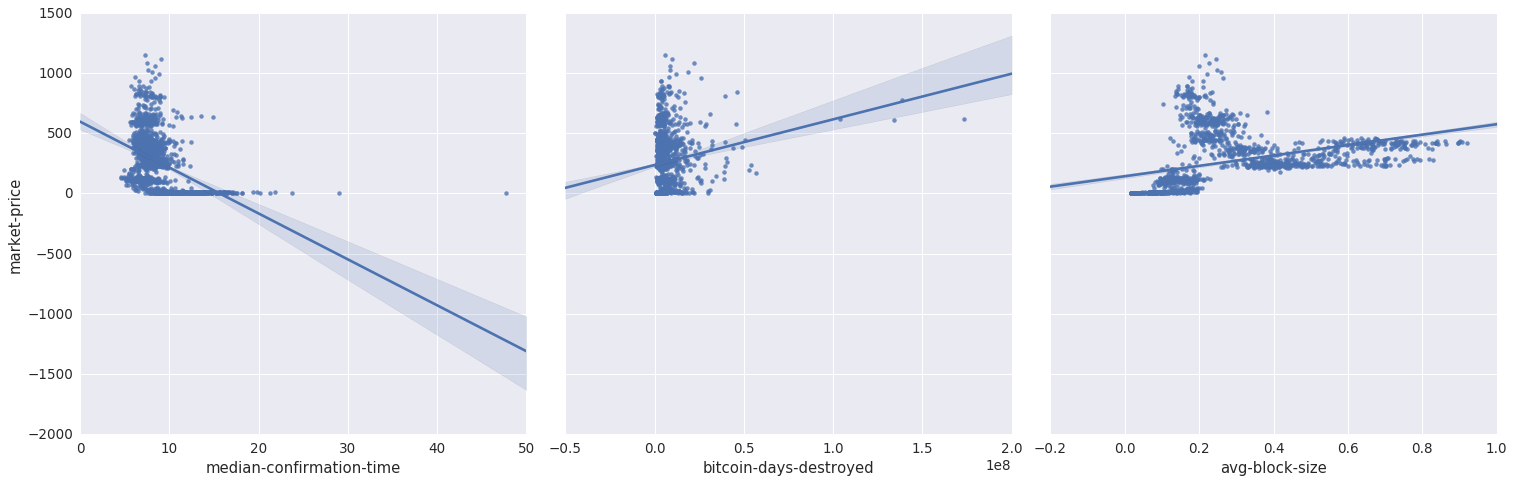

In [25]:
data = pd.concat(FRAMES, axis = 1)
sns.set_context("notebook", font_scale=1.35)
sns.pairplot(data, x_vars = CHARTS[1:4], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[4:8], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[8:12], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[12:16], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[16:20], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[20:], y_vars = CHARTS[0], size = 7, kind = 'reg')

In [26]:
def filter_features(mask):
    return list(map(lambda t: t[1], filter(lambda t: t[0], zip(mask, FEATURES))))

def fitness_fun(model):
    method, metric, indiv = model

    # Sometimes the genetic algorithm produces an all-zero chromosome,
    # which would brake the code. 
    if(sum(indiv) == 0):
        indiv[0] = 1
    
    filtered_features = filter_features(indiv)
    size = len(filtered_features)
    filtered_features = pd.concat(filtered_features, axis = 1)
    
    # 70% of the data will be used for training,
    # 15% will be used for validation and testing.
    
    train_dates = filtered_features.index[:int(0.7*len(filtered_features))]
    
    # Input: Network features from the previous day.
    btc_X_train = filtered_features[train_dates[0] : train_dates[-2]]
    # Output: The price on the current day.
    btc_y_train = pd.DataFrame(FRAMES[0])[train_dates[1] : train_dates[-1]]

    valid_dates = filtered_features.index[int(0.7*len(filtered_features)) : int(0.85*len(filtered_features))]
    
    # Input: Network features from the previous day.
    btc_X_valid = filtered_features[valid_dates[0] : valid_dates[-2]]
    # Output: The price on the current day.
    btc_y_valid = pd.DataFrame(FRAMES[0])[valid_dates[1] : valid_dates[-1]]

    # Train the learner on the training data
    # and evaluate the performance by the test data

    method.fit(btc_X_train, btc_y_train)
    
    score = metric(btc_X_valid, btc_y_valid)
    
    return score, size

def nsga2_feat_sel(method, metric, objective, gen_num, indiv_num):
    creator.create("FitnessMulti", base.Fitness, weights = objective)
    creator.create("Individual", list, fitness=creator.FitnessMulti) 
    toolb.register('bit', random.randint, 0, 1)
    toolb.register('individual', tools.initRepeat, creator.Individual, toolb.bit, n = len(FEATURES))
    toolb.register('population', tools.initRepeat, list, toolb.individual, n = indiv_num)
    toolb.register('evaluate', fitness_fun)
    toolb.register('mate', tools.cxUniform, indpb = 0.1)
    toolb.register('mutate', tools.mutFlipBit, indpb = 0.05)
    toolb.register('select', tools.selNSGA2)

    population = toolb.population()
    fits = map (toolb.evaluate, map(lambda x: (method, metric, x), population))

    hof = tools.HallOfFame(1)

    for fit, ind in zip(fits, population):
        ind.fitness.values = fit

    best = np.ndarray((gen_num, 1))
    top_RMSE = []

    for gen in range(gen_num):
        offspring = algorithms.varOr(population, toolb, lambda_ = indiv_num, cxpb = 0.5, mutpb = 0.1)
        hof.update(offspring)

        fits = map (toolb.evaluate, map(lambda x: (method, metric, x), offspring))

        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        population = toolb.select(offspring + population, k = indiv_num)

        best[gen] = hof[0].fitness.values[0]
        top_RMSE = hof[0]

    chromosome = hof[0]
    selected_features = list(map(lambda t: t[1], filter(lambda t: t[0], zip(hof[0], CHARTS[1:]))))
    
    return best, selected_features, chromosome

# NSGA2-MLR feature selection with R2, RMSE and MAE metrics

Features selected by NSGAII-MLR with R2:
 ['miners-revenue', 'cost-per-transaction', 'output-volume', 'estimated-transaction-volume-usd', 'trade-volume', 'tx-trade-ratio', 'median-confirmation-time'] 

Chromosome:  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0] 


Features selected by NSGAII-MLR with RMSE:
 ['cost-per-transaction', 'network-deficit', 'output-volume', 'estimated-transaction-volume-usd', 'trade-volume', 'tx-trade-ratio'] 

Chromosome:  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0] 


Features selected by NSGAII-MLR with MAE:
 ['miners-revenue', 'cost-per-transaction', 'trade-volume', 'tx-trade-ratio'] 

Chromosome:  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] 




<function __main__.feature_selection>

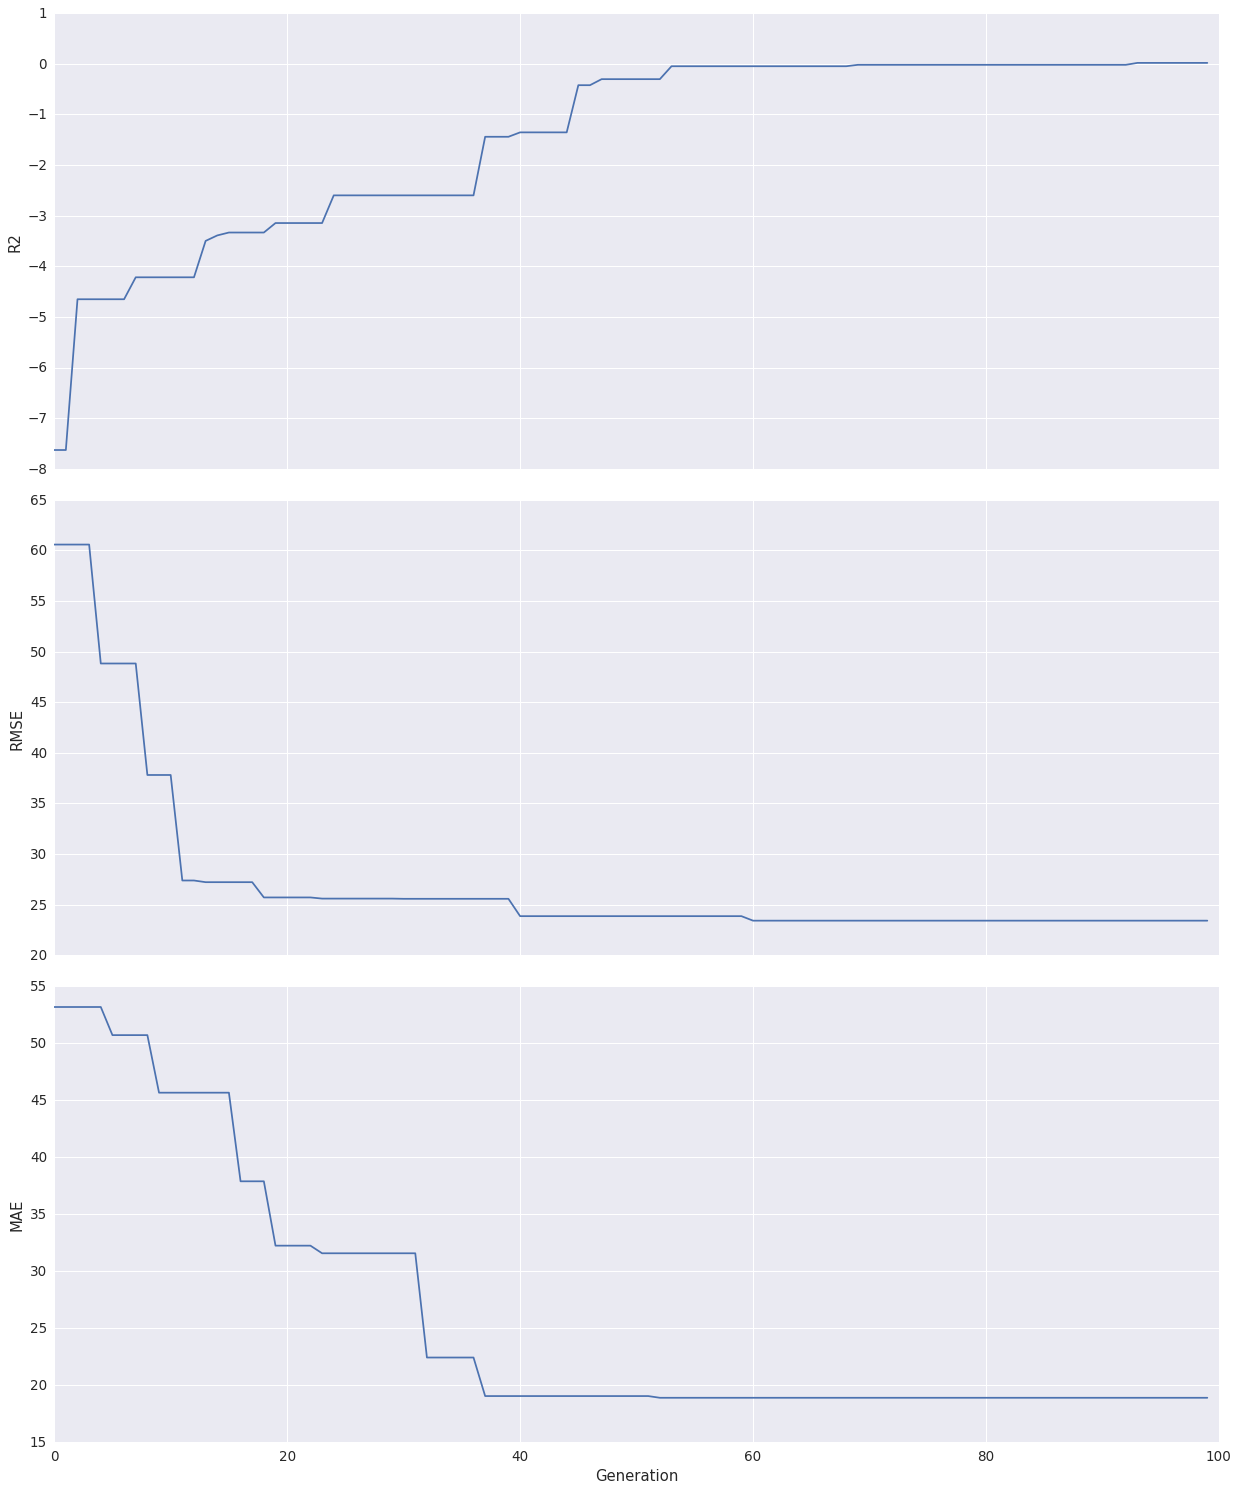

In [33]:
def feature_selection(gen_num, indiv_num):
    regr = linear_model.LinearRegression()

    r2_results = nsga2_feat_sel(regr, regr.score, (1.0, -1.0), gen_num, indiv_num)

    print ('Features selected by NSGAII-MLR with R2:\n', r2_results[1], '\n')
    print ('Chromosome: ', r2_results[2], '\n\n')

    RMSE = lambda x, y: np.sqrt(mse(y, regr.predict(x)))
    rmse_results = nsga2_feat_sel(regr, RMSE, (-1.0, -1.0), gen_num, indiv_num)

    print ('Features selected by NSGAII-MLR with RMSE:\n', rmse_results[1], '\n')
    print ('Chromosome: ', rmse_results[2], '\n\n')
    
    MAE = lambda x, y: mae(y, regr.predict(x))
    mae_results = nsga2_feat_sel(regr, MAE, (-1.0, -1.0), gen_num, indiv_num)

    print ('Features selected by NSGAII-MLR with MAE:\n', mae_results[1], '\n')
    print ('Chromosome: ', mae_results[2], '\n\n')
    
    # Create dataframes from the metrics
    r2_df = pd.DataFrame(r2_results[0], columns = ['R2'])
    rmse_df = pd.DataFrame(rmse_results[0], columns = ['RMSE'])
    mae_df = pd.DataFrame(mae_results[0], columns = ['MAE'])
    
    # Concatenate the metrics dataframes for visualization
    metrics_df = pd.concat([r2_df, rmse_df, mae_df], axis = 1)
    metrics_df.insert(0, 'Generation', metrics_df.index)
    
    # Plot the best individuals of each generation based on the metrics
    g = sns.PairGrid(metrics_df, y_vars=['R2', 'RMSE', 'MAE'], x_vars = 'Generation', size=7, aspect = 2.5)
    g.map(plt.plot)
    
widgets.interact(feature_selection,  
                 gen_num = 100, 
                 indiv_num = 35)

# Visualizing the actual and predicted prices 

R2: 0.625977721
RMSE: 47.549666269
MAE: 35.556726415

Sign change accuracy:  53.2188841202 %




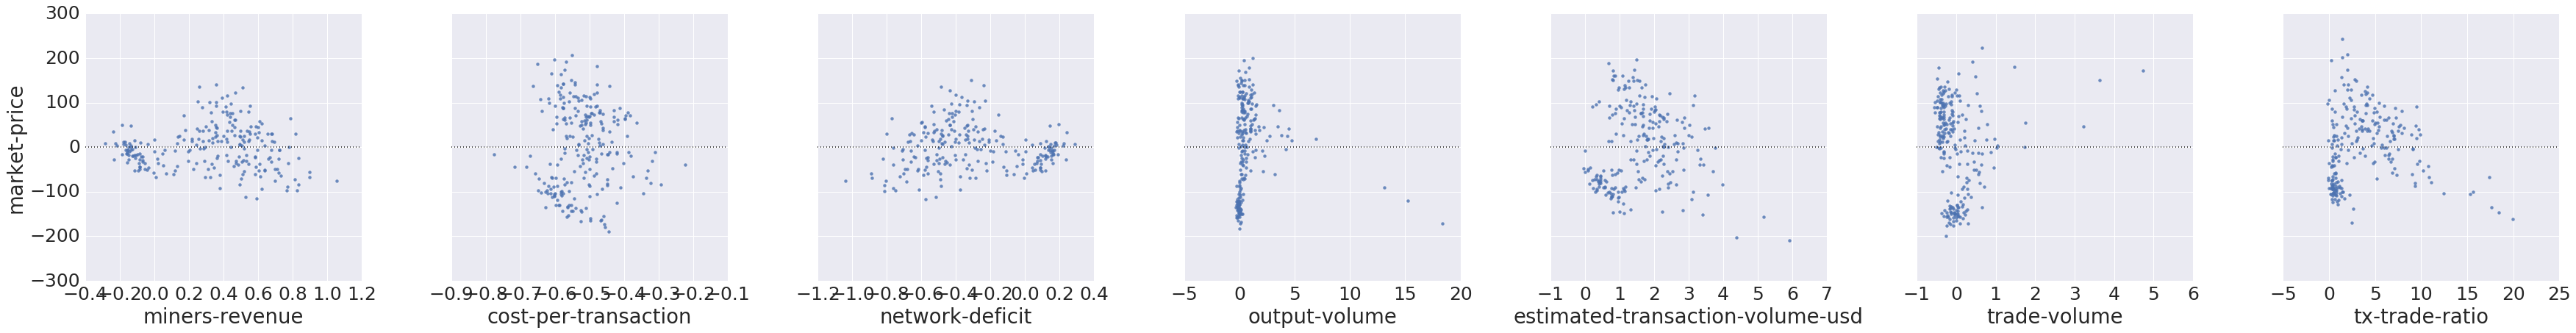

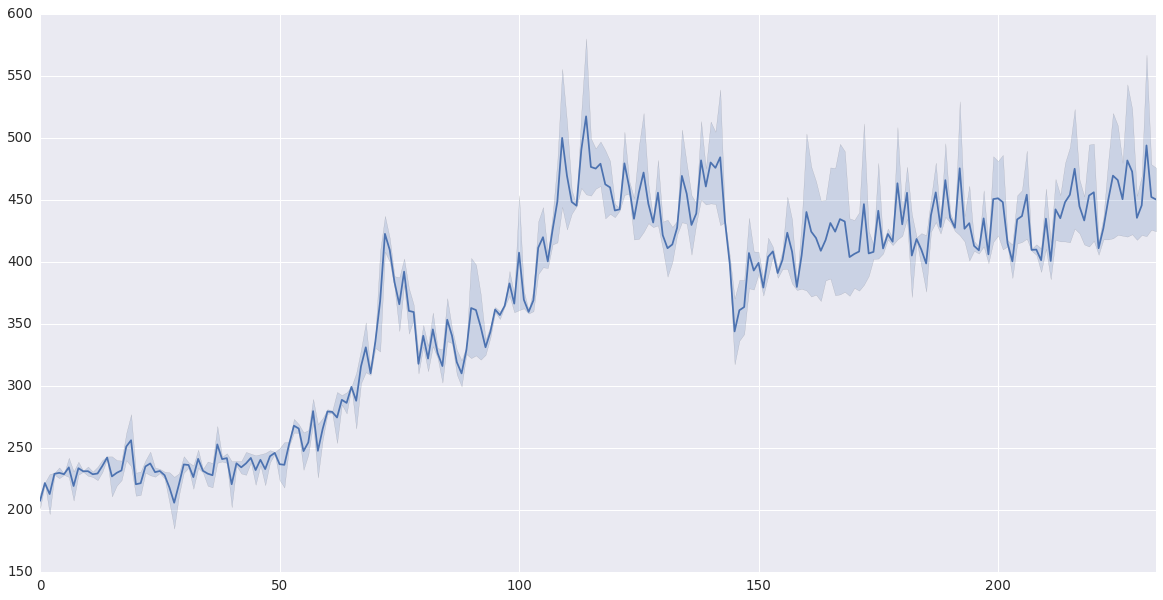

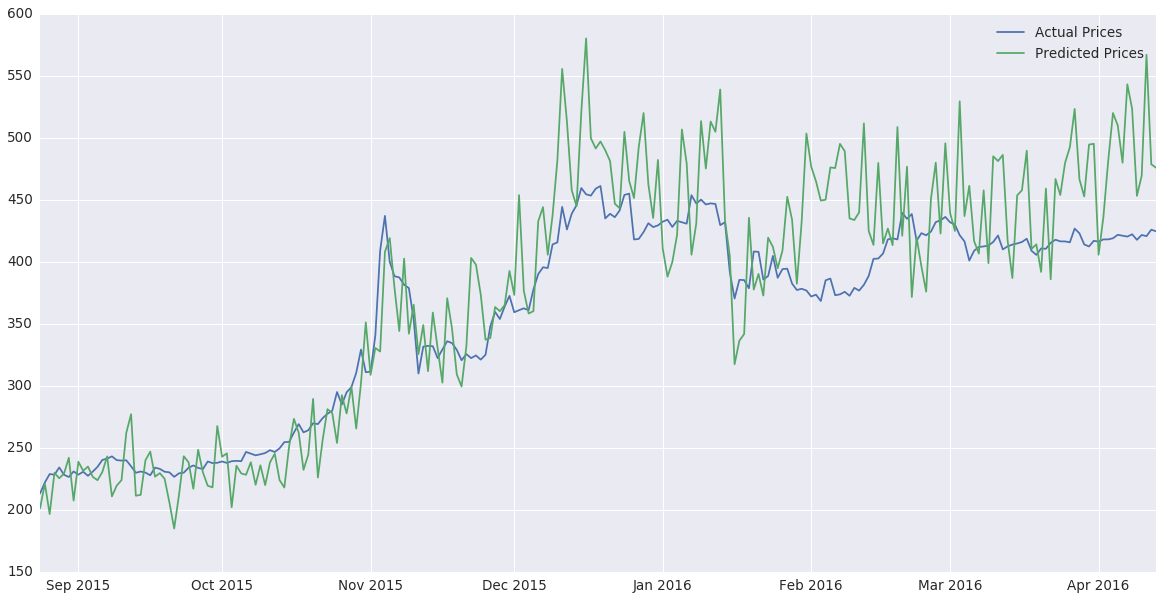

R2: 0.634729296
RMSE: 46.990077097
MAE: 34.998907419

Sign change accuracy:  53.2188841202 %




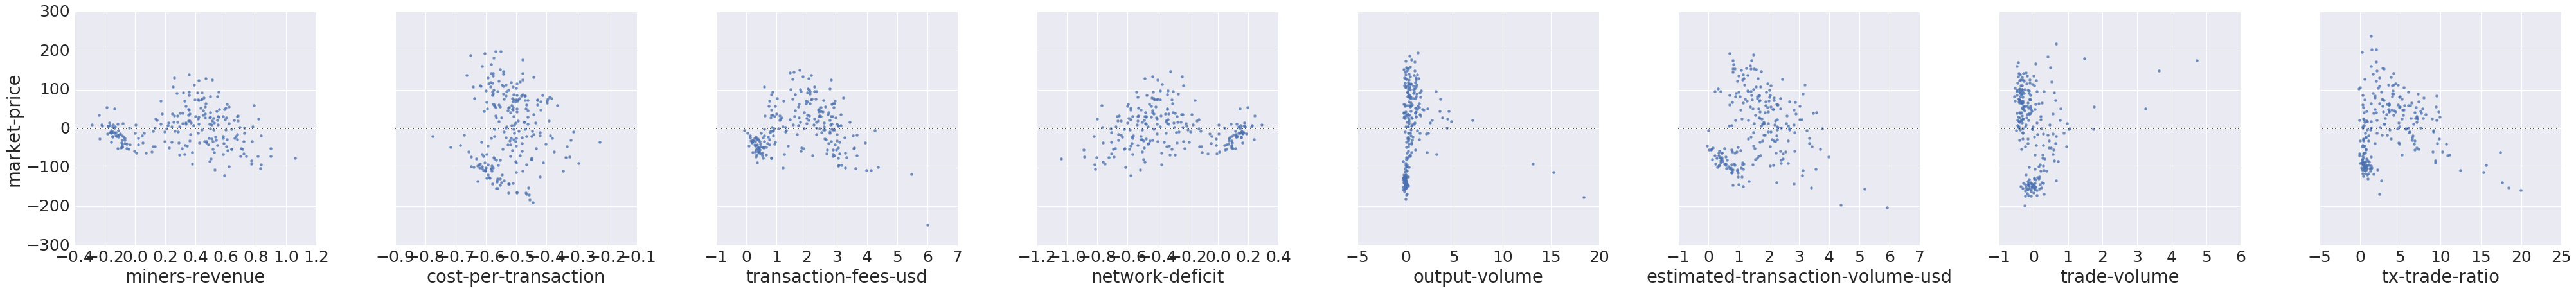

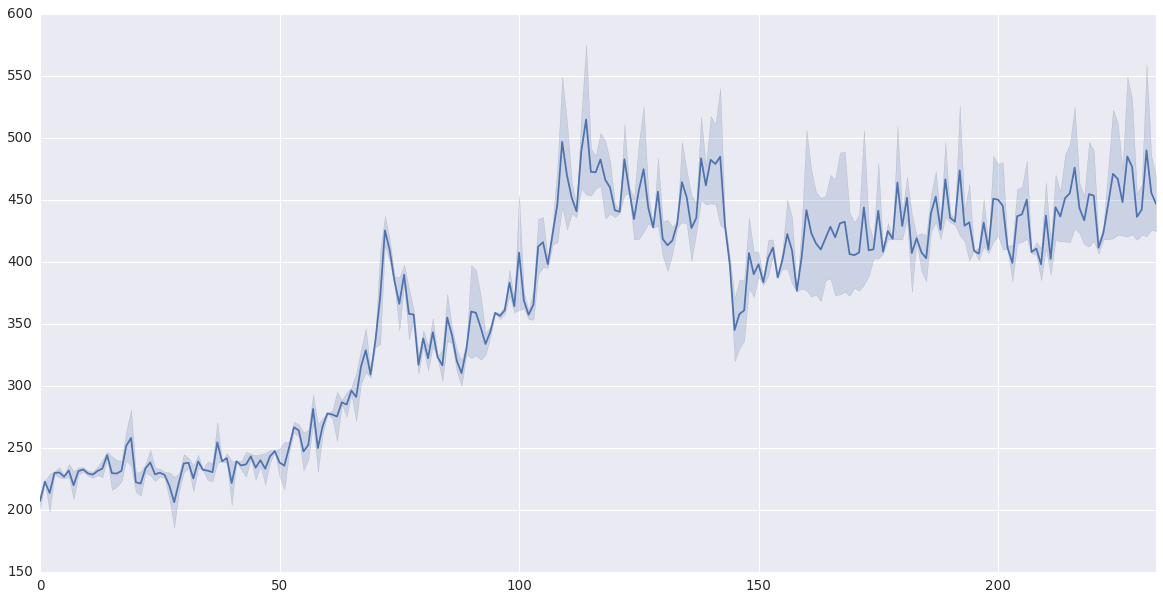

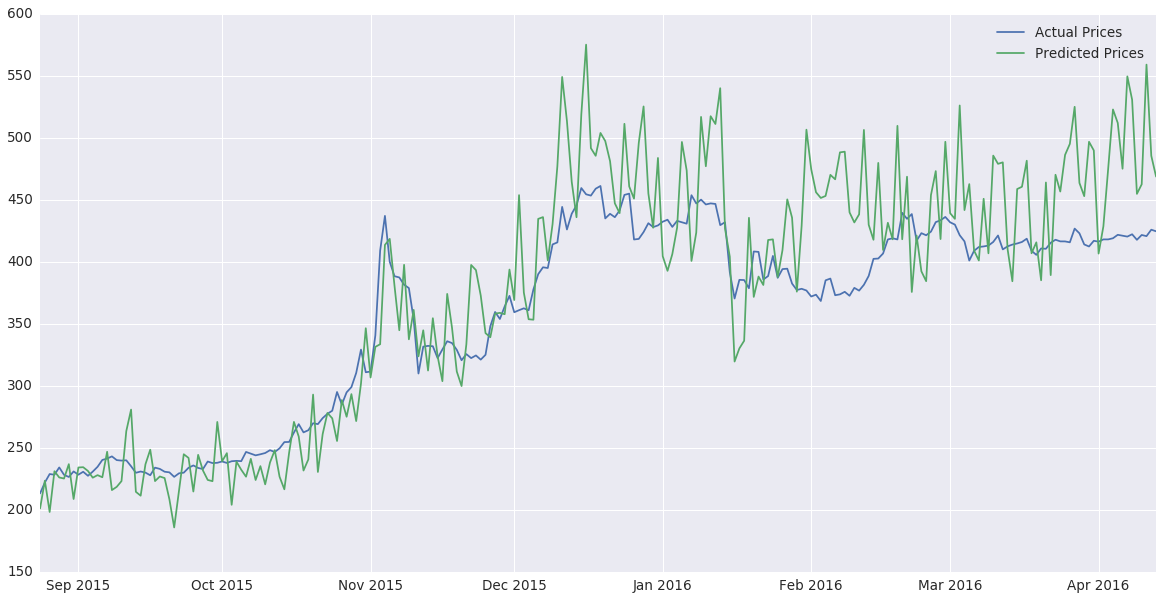

R2: 0.770857533
RMSE: 37.217871217
MAE: 28.243660230

Sign change accuracy:  51.0729613734 %




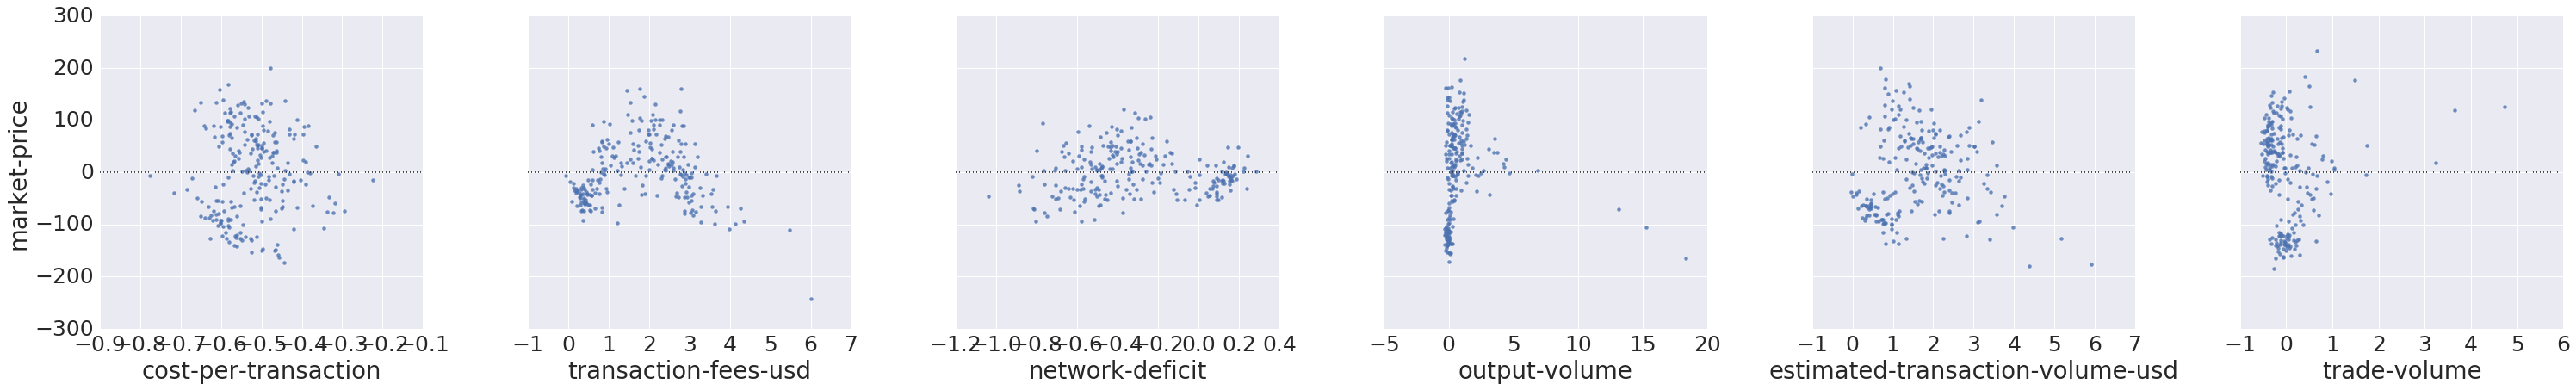

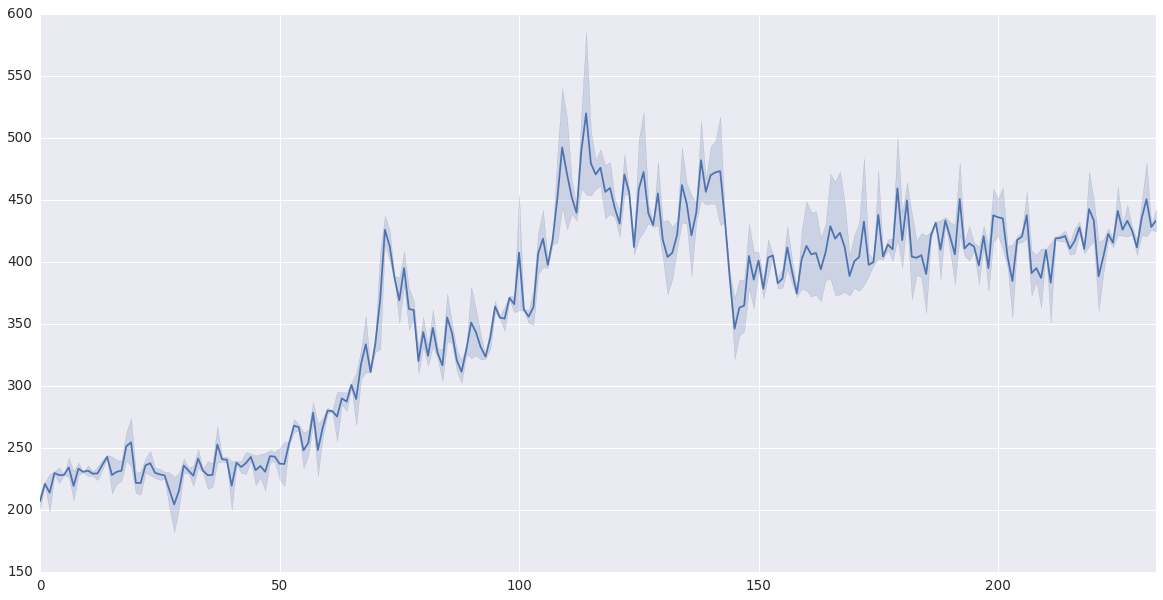

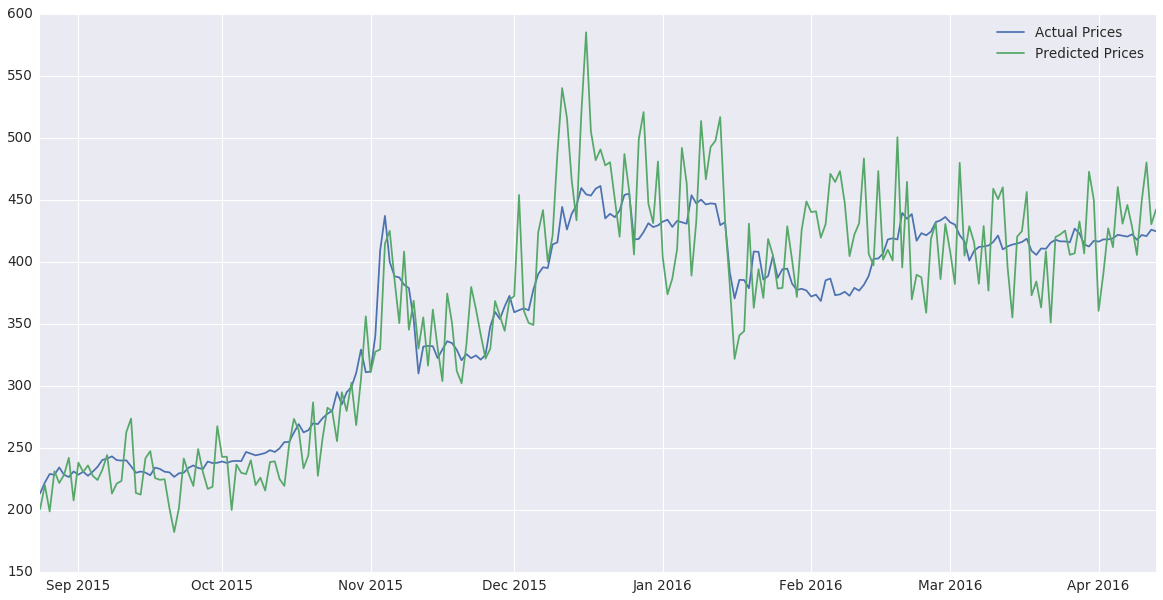

R2: 0.771213976
RMSE: 37.188912801
MAE: 28.233852304

Sign change accuracy:  51.0729613734 %




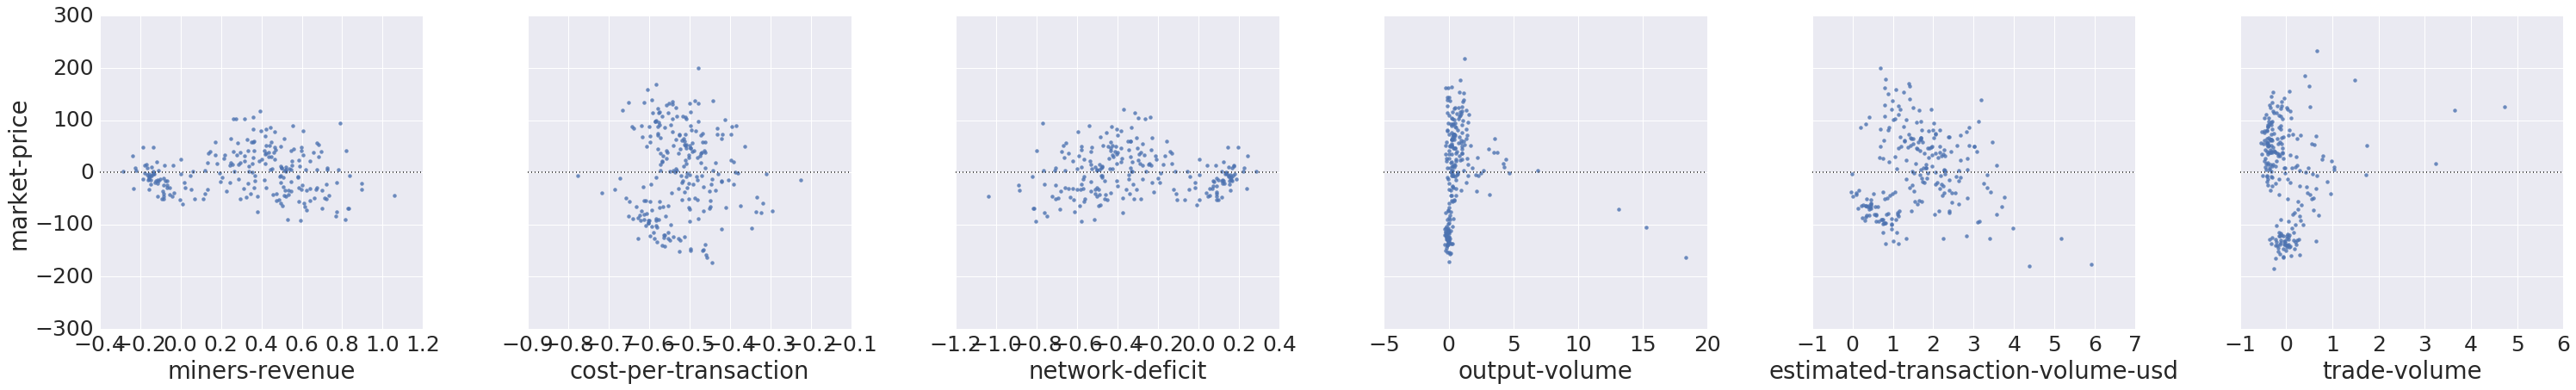

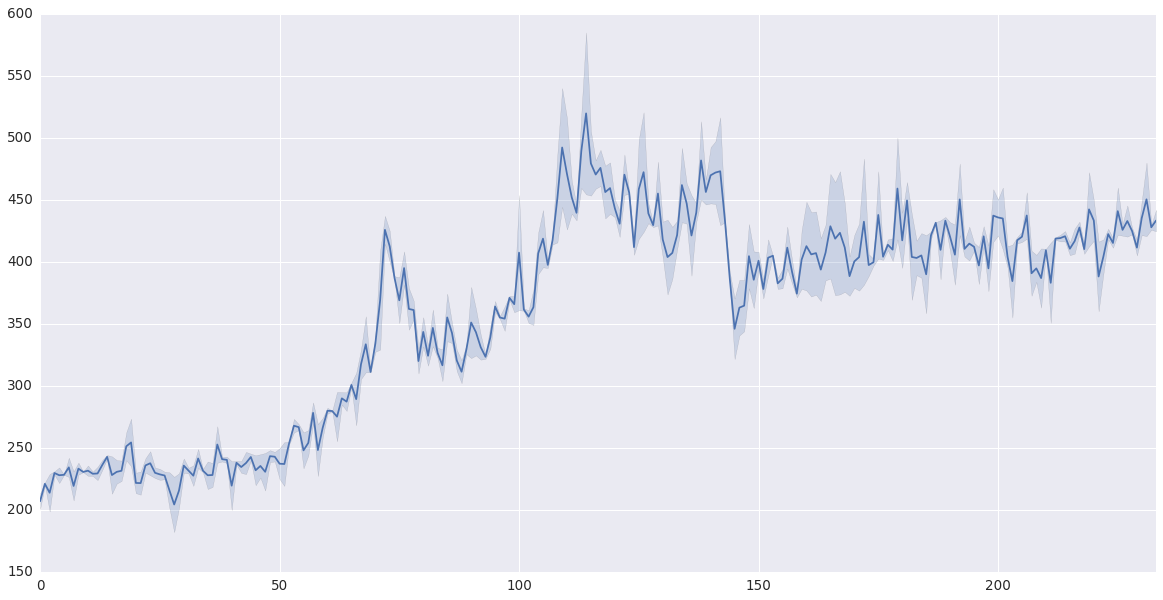

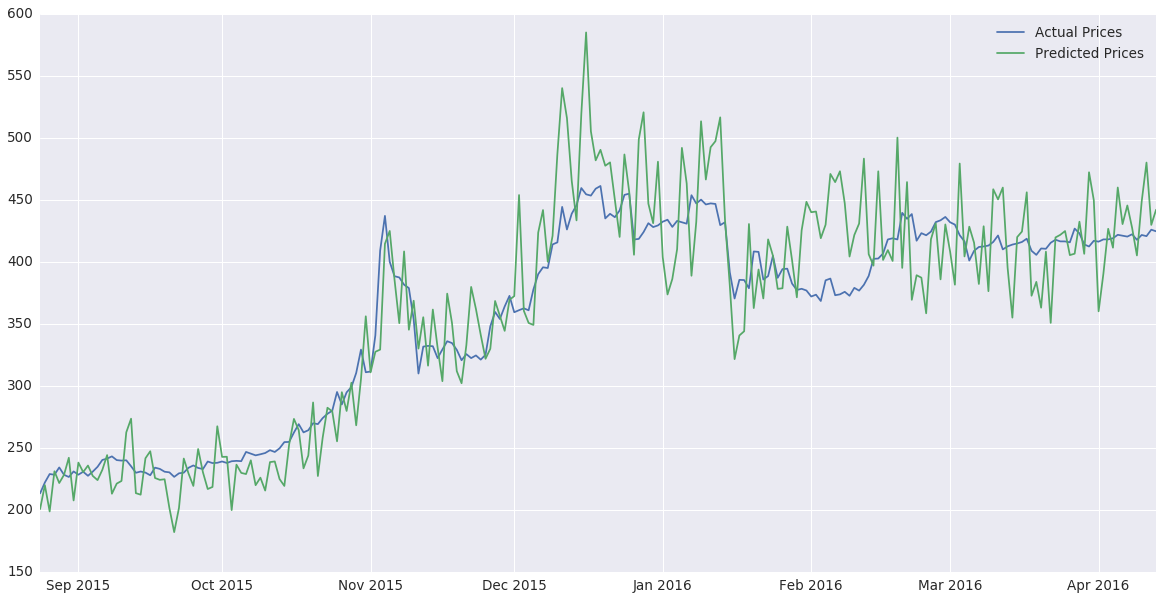

R2: 0.558382143
RMSE: 51.668047476
MAE: 38.939572482

Sign change accuracy:  52.3605150215 %




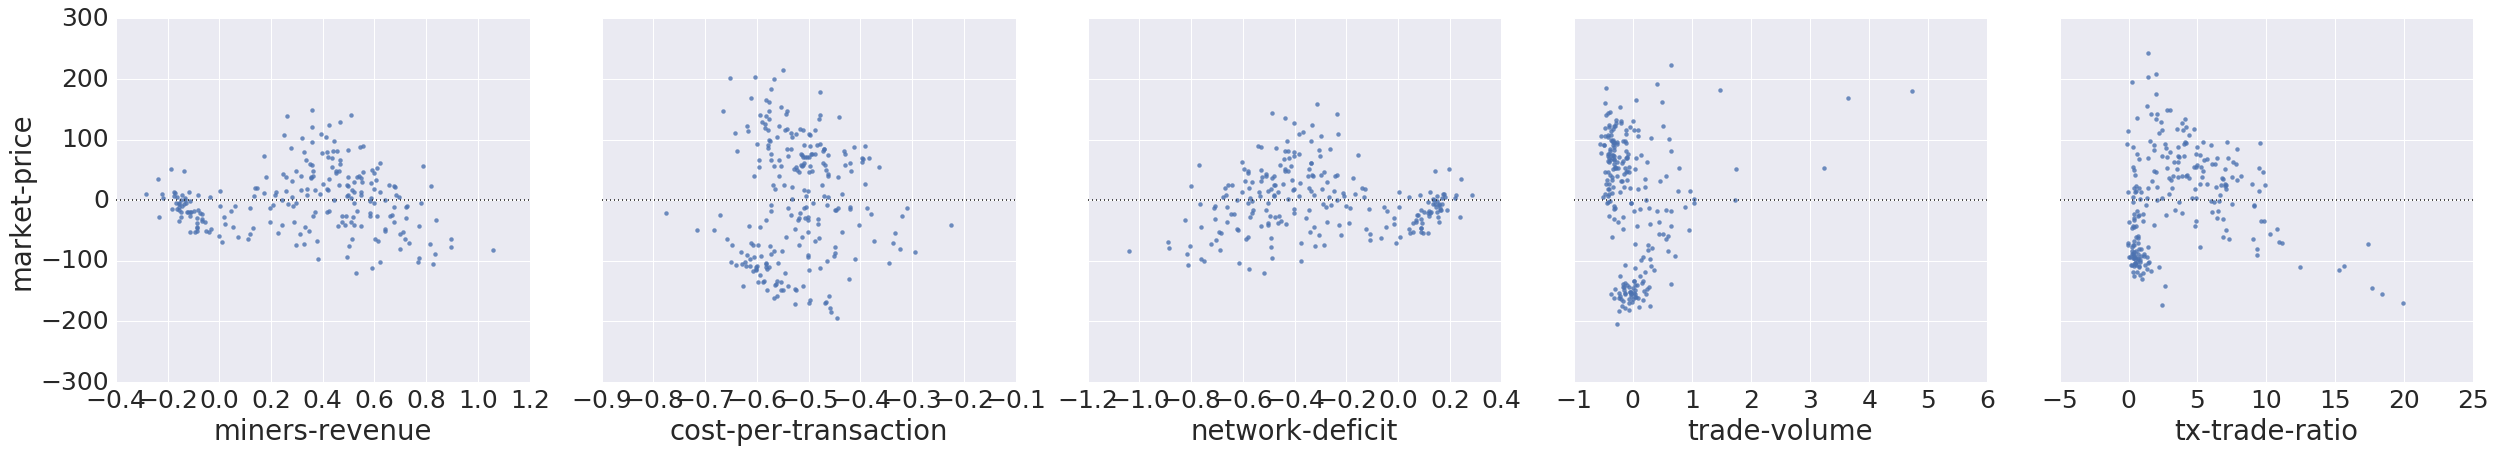

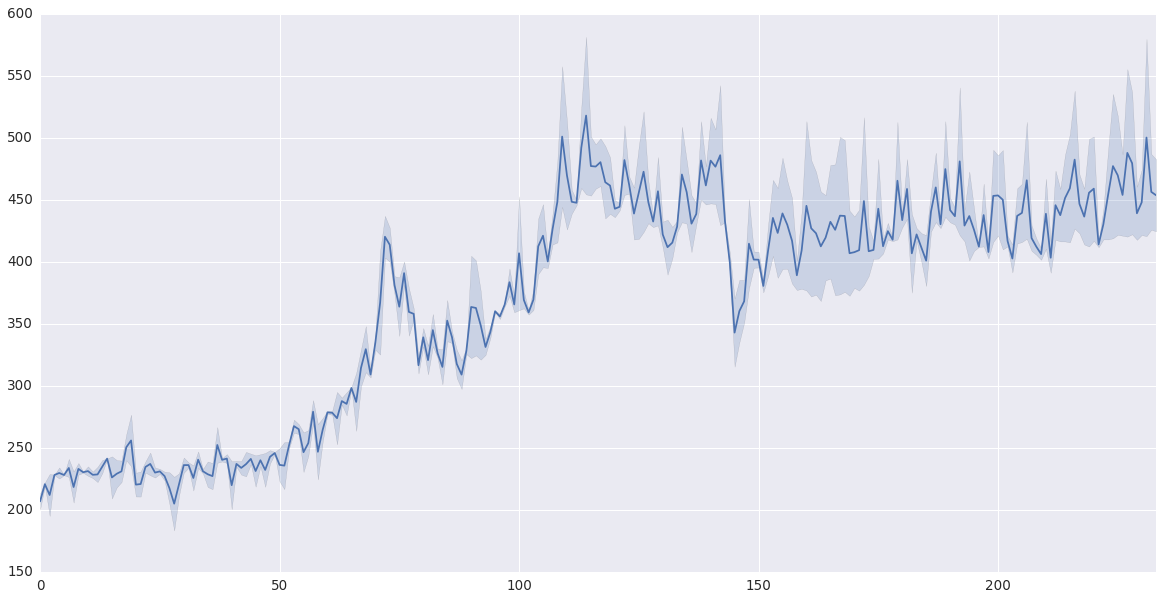

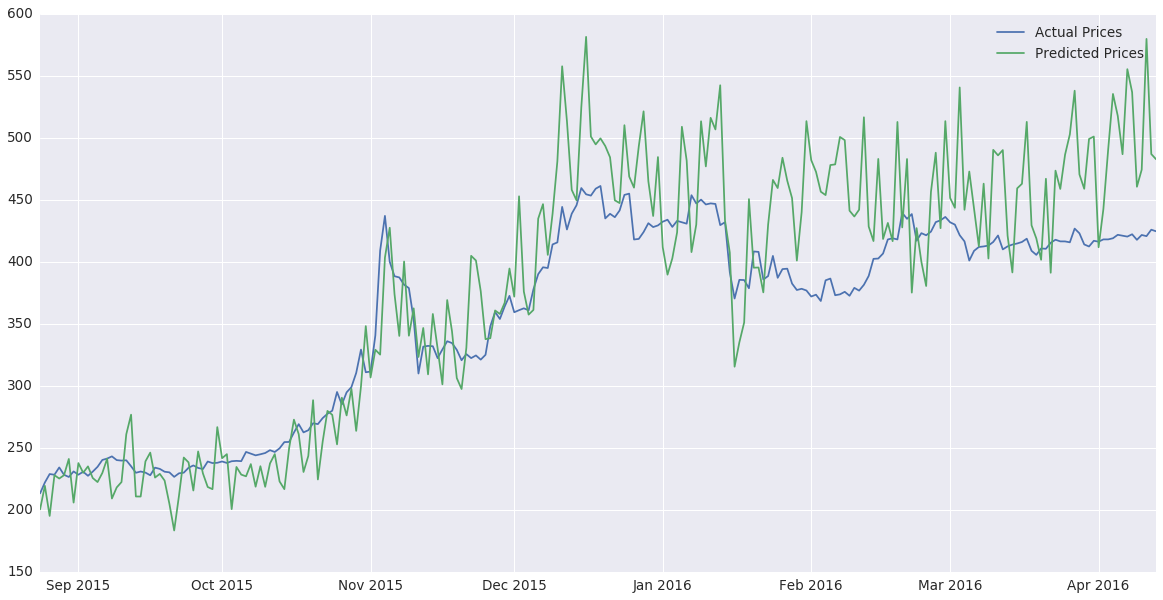

R2: 0.596624778
RMSE: 49.380256953
MAE: 36.615853892

Sign change accuracy:  53.2188841202 %




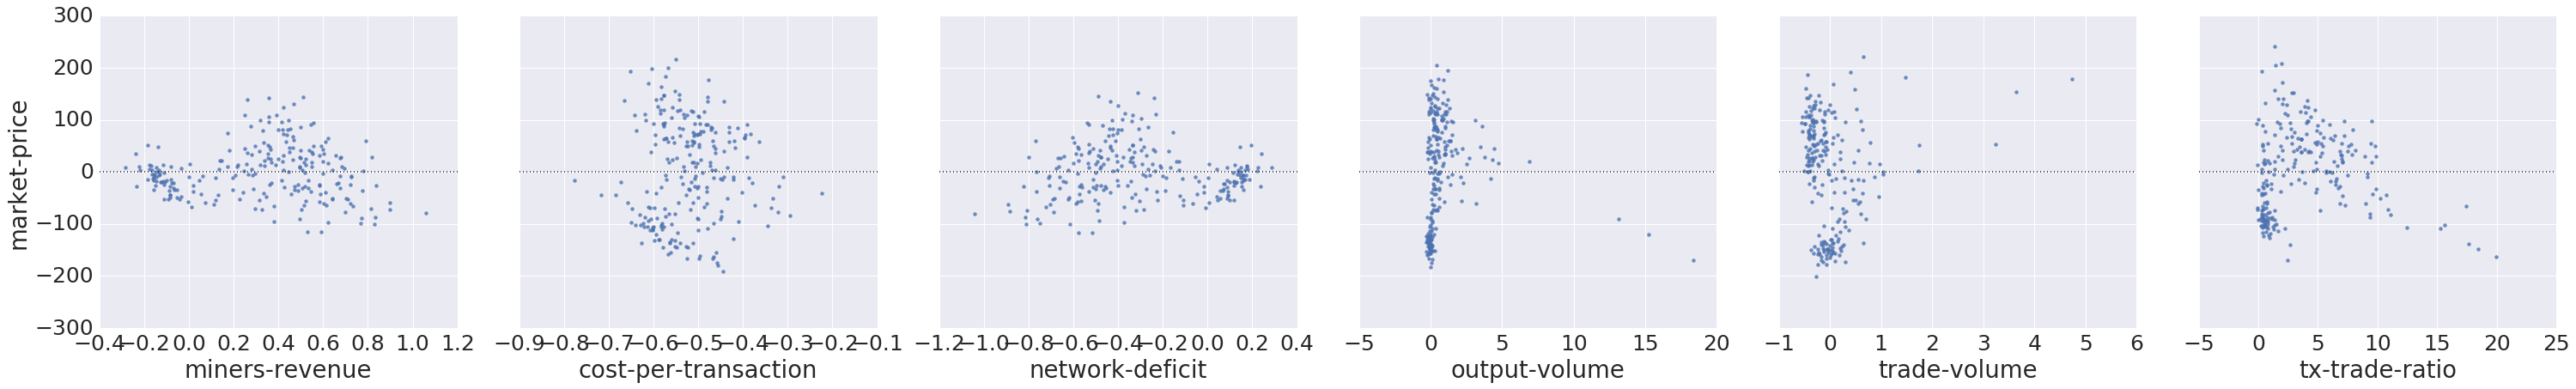

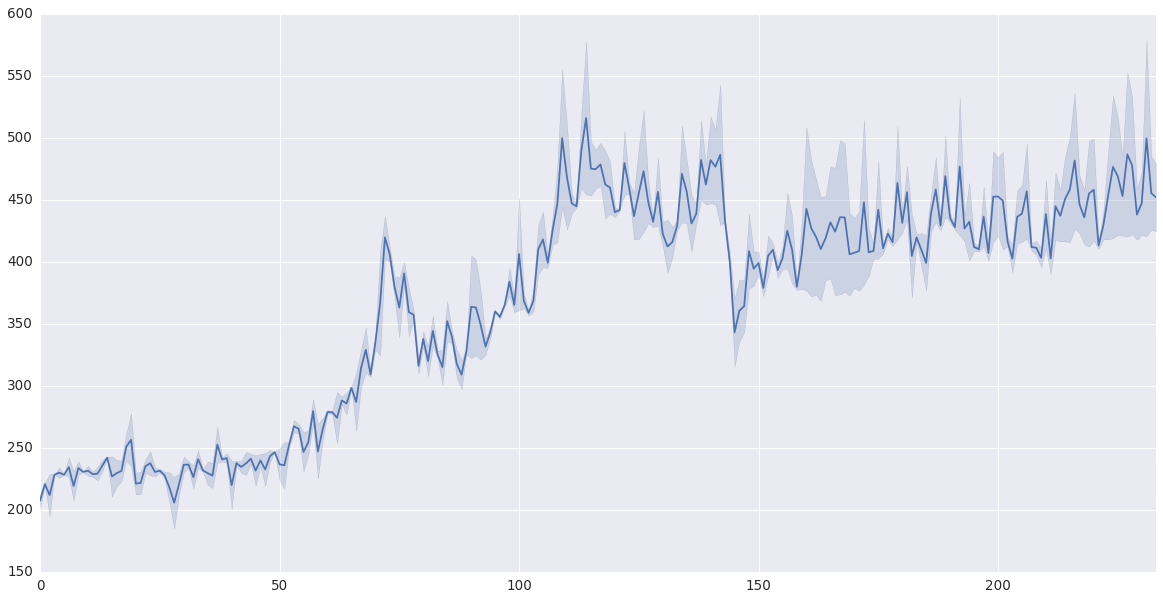

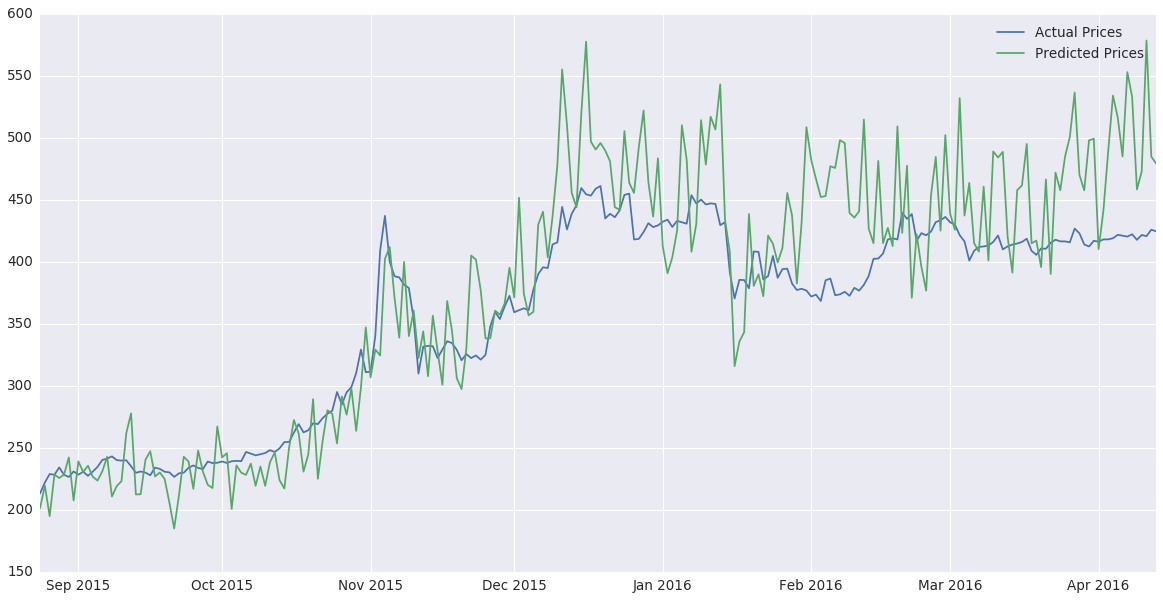

R2: 0.767593139
RMSE: 37.482039124
MAE: 28.583264749

Sign change accuracy:  51.5021459227 %




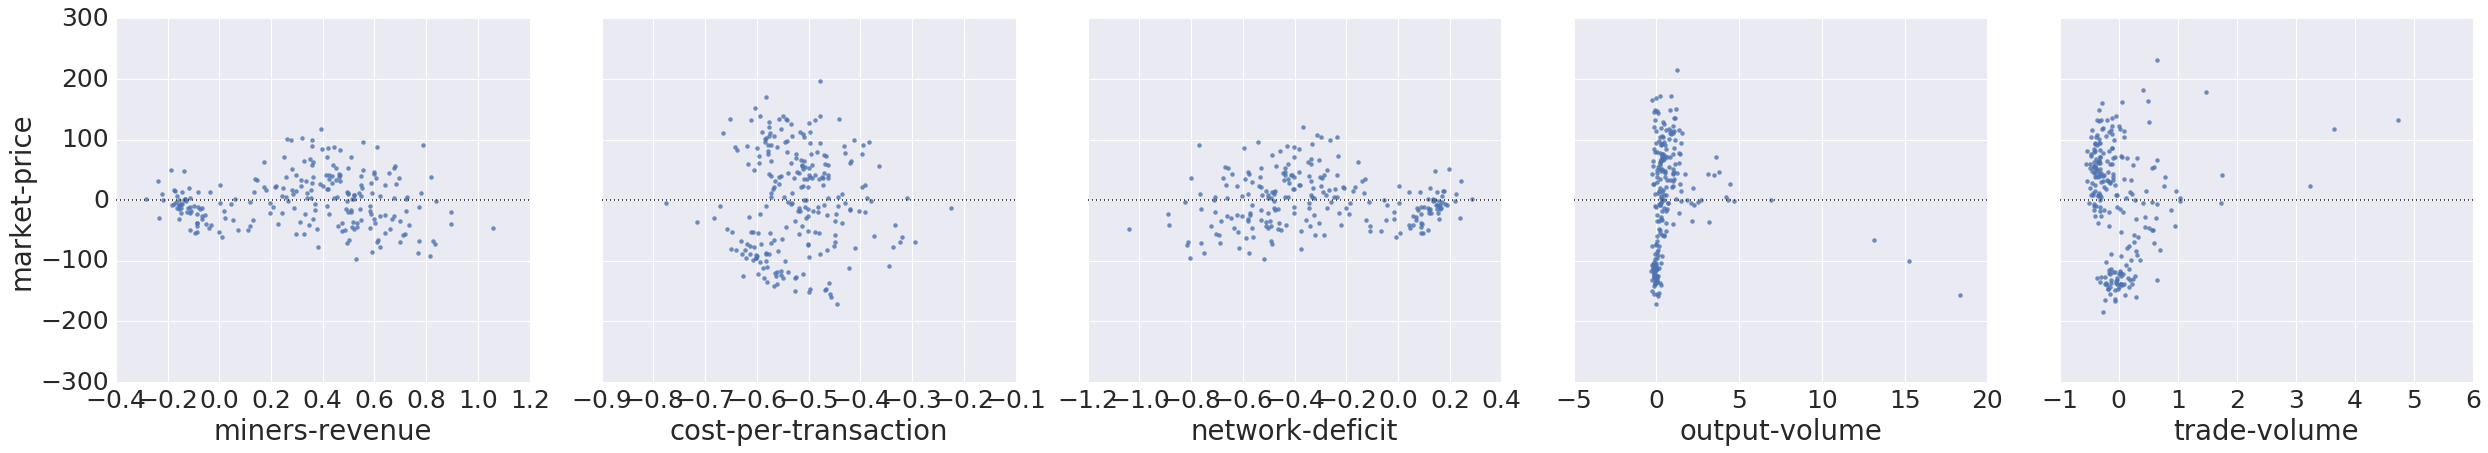

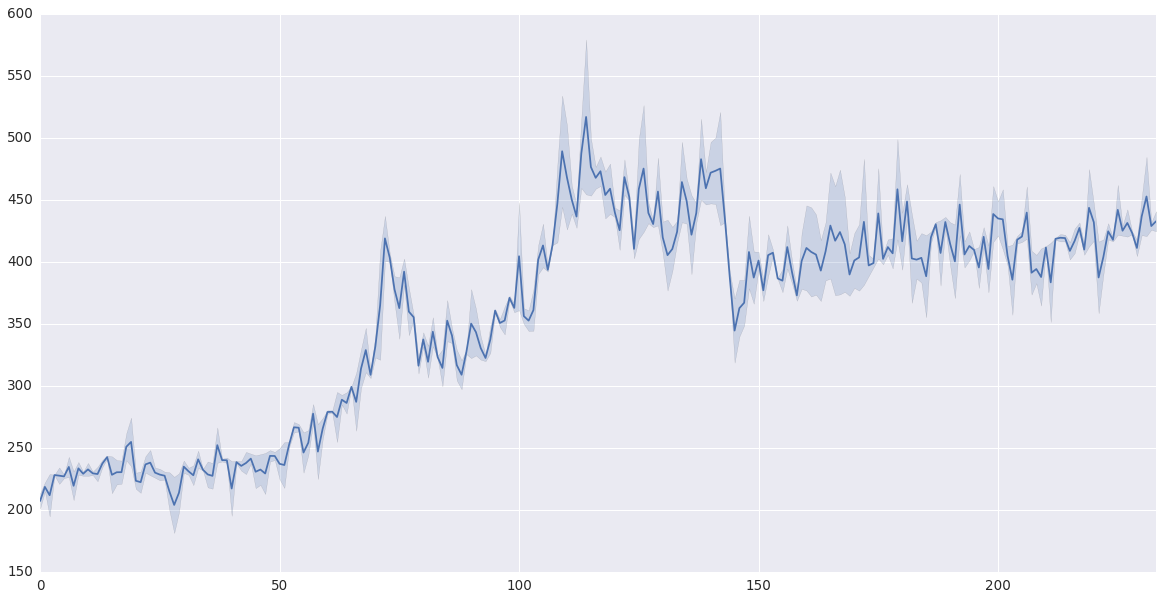

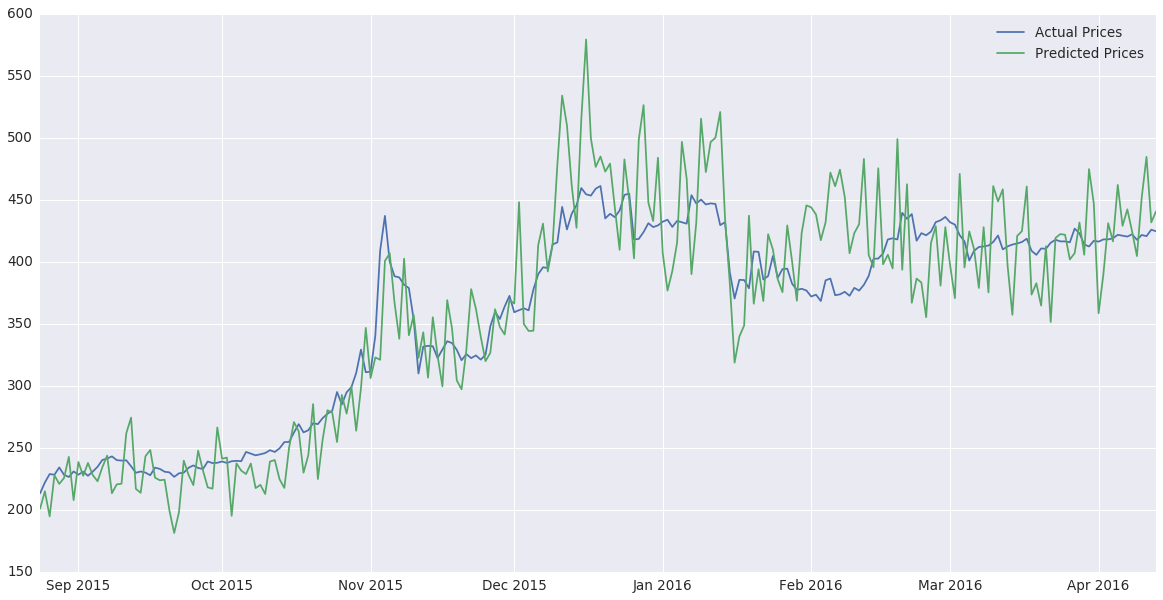

R2: 0.549192316
RMSE: 52.202871404
MAE: 39.115663105

Sign change accuracy:  53.6480686695 %




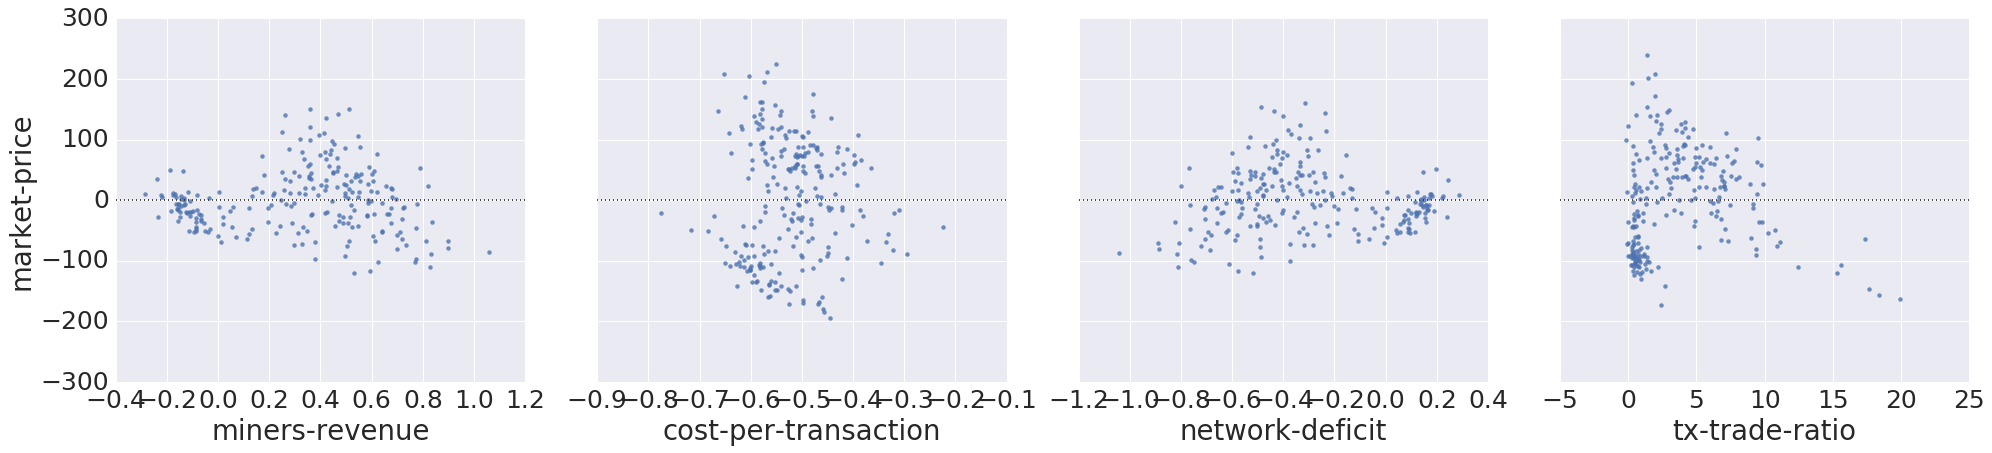

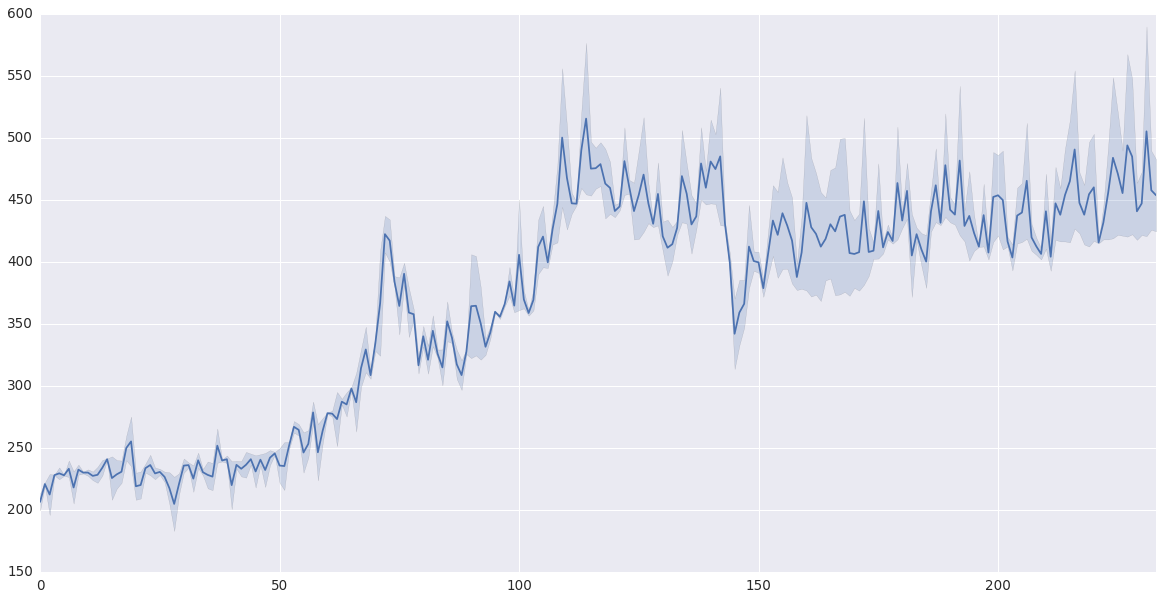

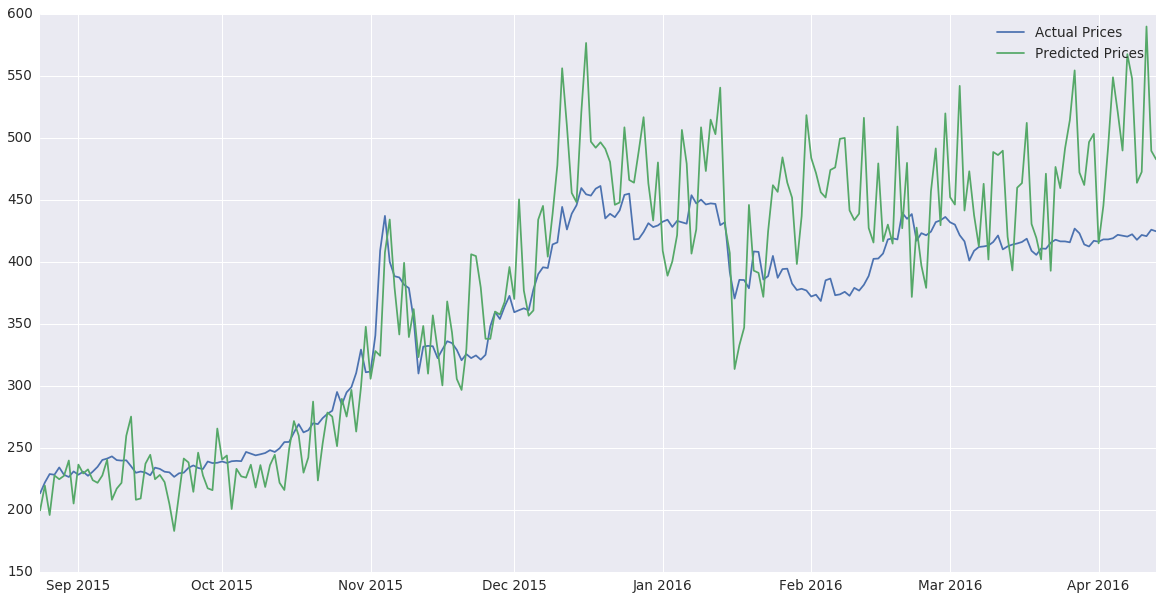

R2: 0.552429213
RMSE: 52.015119780
MAE: 39.007629403

Sign change accuracy:  54.0772532189 %




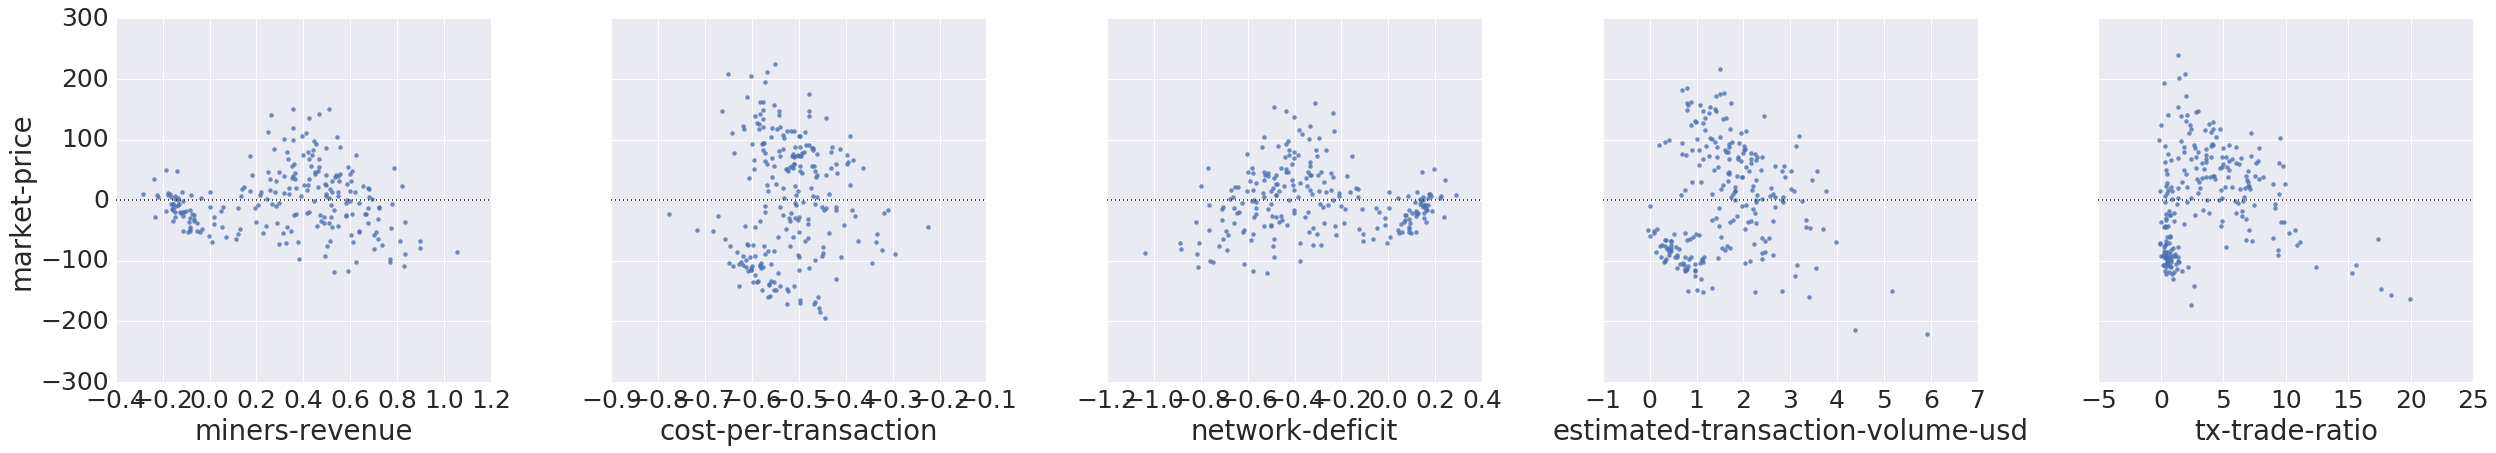

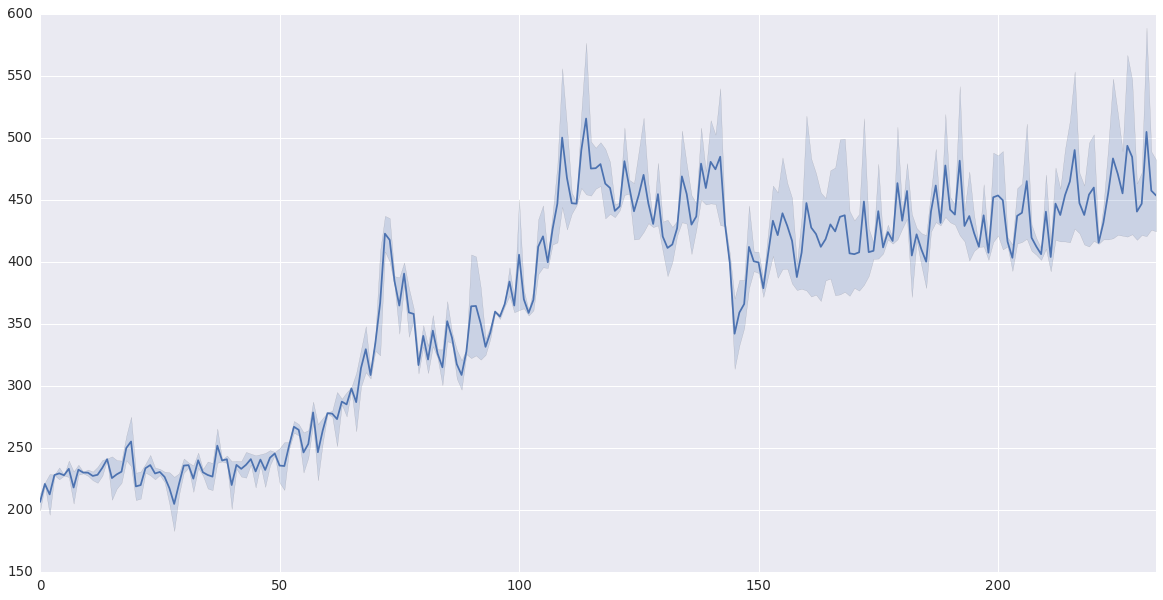

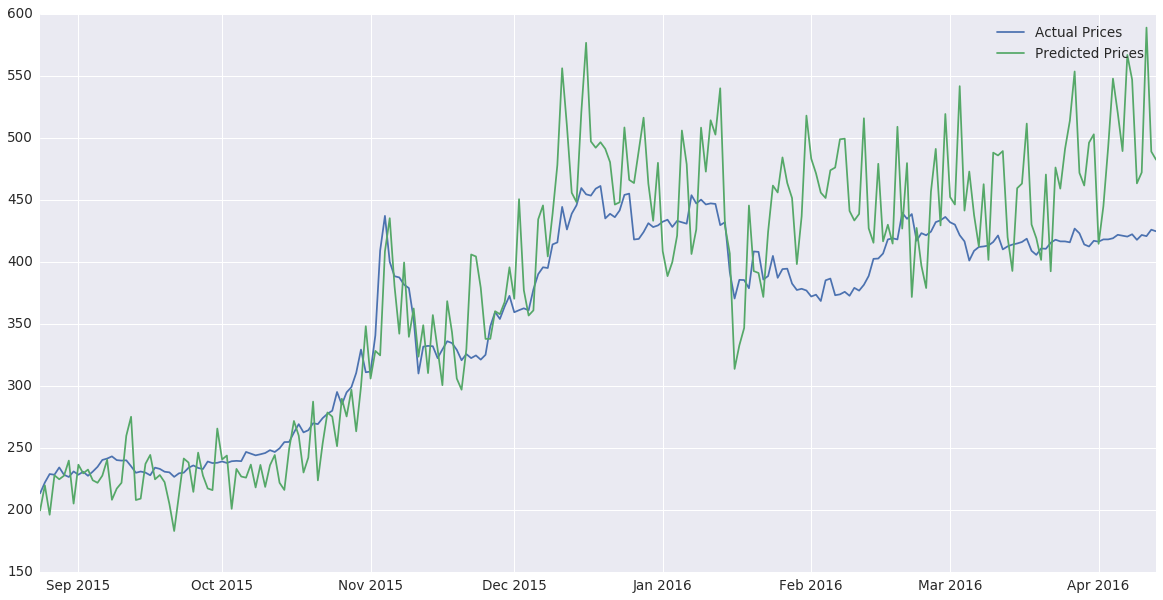

R2: -0.365827186
RMSE: 90.864996306
MAE: 79.609019246

Sign change accuracy:  51.9313304721 %




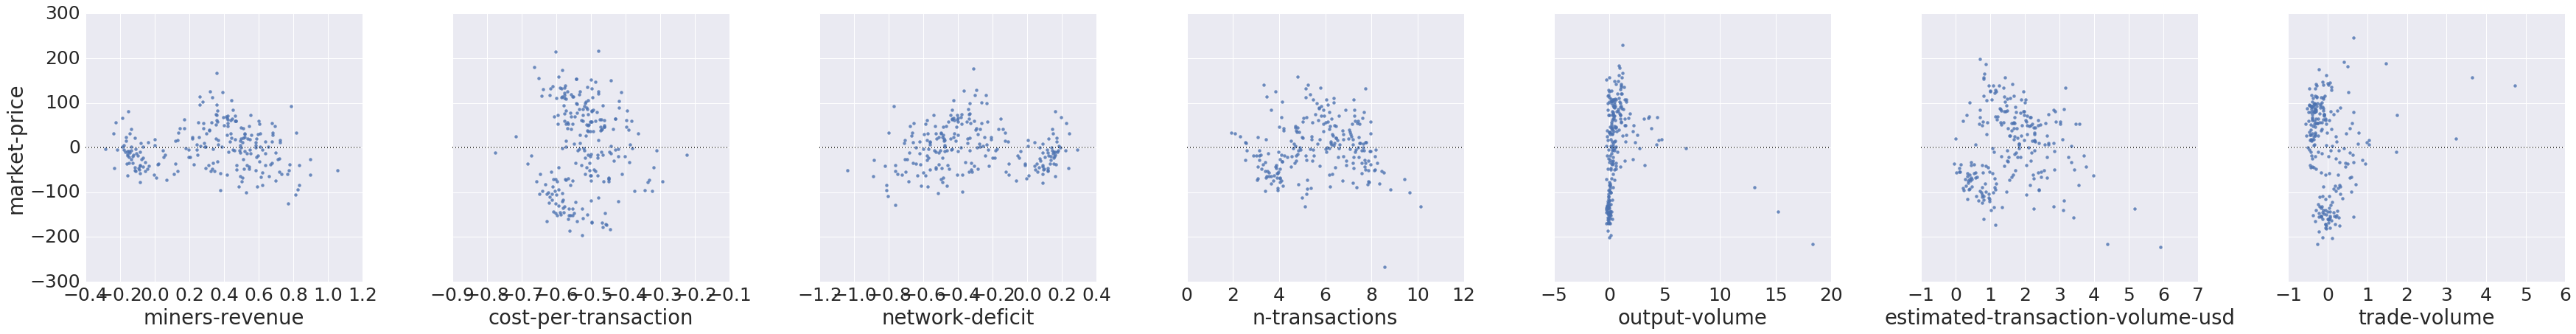

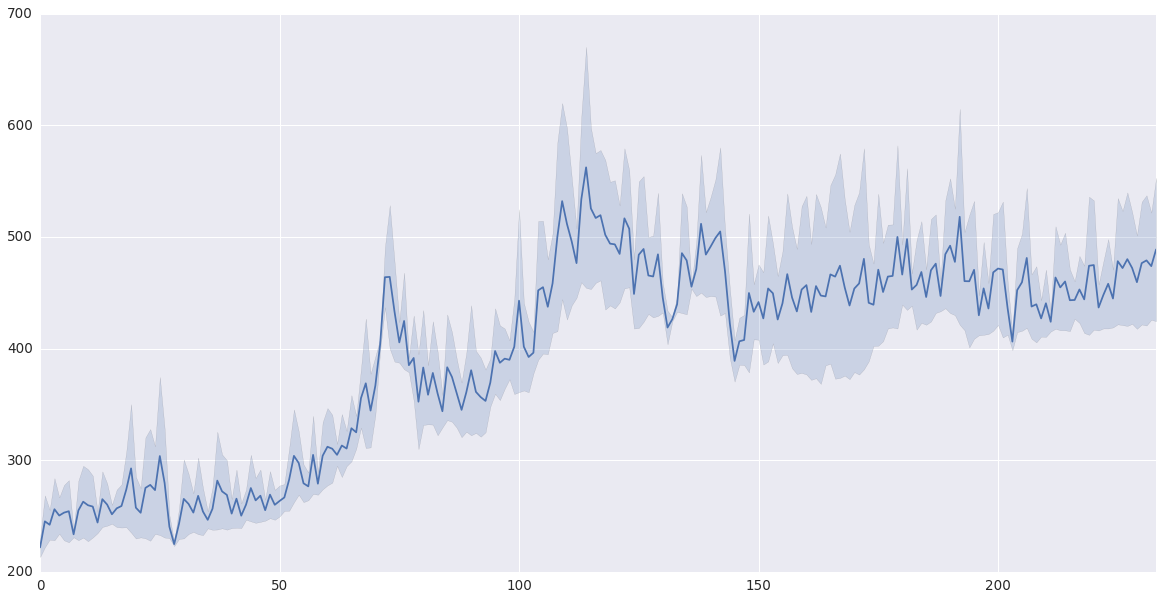

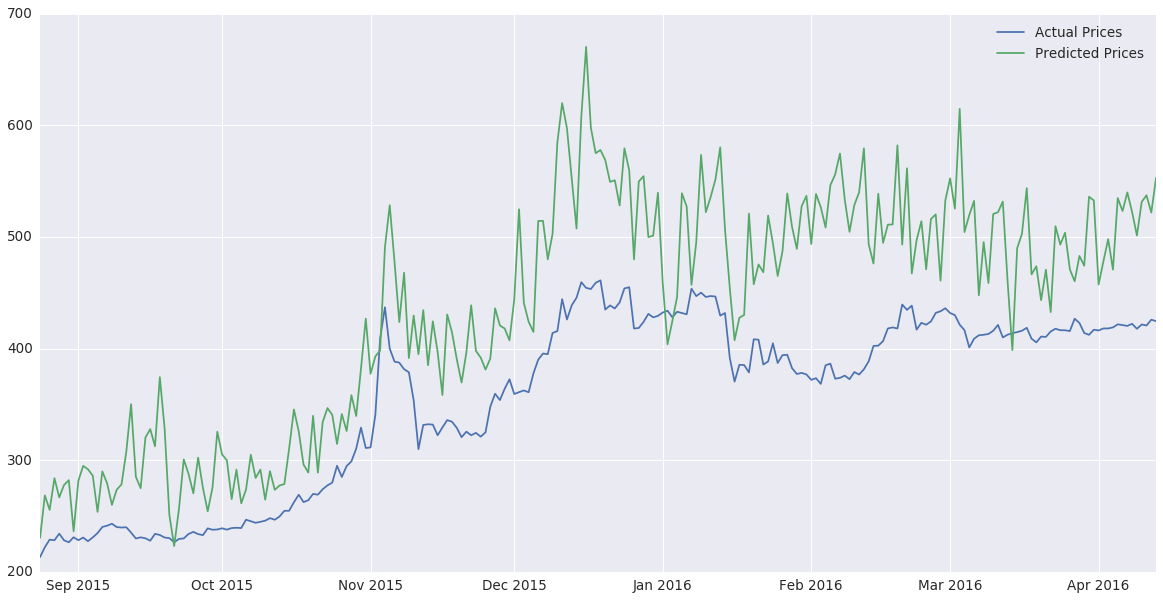

In [34]:
# Create the checkbox placeholder
box = widgets.VBox()
cbs = map(lambda x: widgets.Checkbox(description = x, value = False), CHARTS[1:])
box.children=[i for i in cbs]
display(box)

button = widgets.Button(description="Evaluate Model", width = 5)

def evaluate(b):
    selected = []
    regr = linear_model.LinearRegression()
    
    # Populate the checkbox placeholder
    for i in range(len(CHARTS[1:])):
        selected.append(box.children[i].value)

    filtered_features = filter_features(selected)
    filtered_features = pd.concat(filtered_features, axis = 1)
    
    # Generate date indices for the training data
    train_dates = filtered_features.index[:int(0.7*len(filtered_features))]
    
    # Generate the training set based on the date indices
    btc_X_train = filtered_features[train_dates[0] : train_dates[-2]]
    btc_y_train = pd.DataFrame(FRAMES[0])[train_dates[1] : train_dates[-1]]
    
    # Train the learner on the training data
    # and evaluate the performance by the test data

    regr.fit(btc_X_train, btc_y_train)
    
    # Generate date indices for the testing data
    test_dates = filtered_features.index[int(0.85*len(filtered_features)):]
    
    # Generate the test set based on the date indices
    btc_X_test = filtered_features[test_dates[0] : test_dates[-2]]
    btc_y_test = pd.DataFrame(FRAMES[0])[test_dates[1] : test_dates[-1]]
    
    # Create a dataframe from the predicted values
    btc_y_pred = pd.DataFrame(regr.predict(btc_X_test), columns = ['market-price'])
    btc_y_pred.set_index(btc_y_test.index,inplace = True)
    
    # Calculate the RMSE and MAE metric scores
    rmse_score = np.sqrt(mse(btc_y_test, btc_y_pred))
    mae_score = mae(btc_y_test, btc_y_pred)
    
    # Calculate the classification accuracy
    act_ticks = list(map(lambda t: 1 if t[1] - t[0] >= 0 else -1, zip(btc_y_test.values, btc_y_test.values[1:])))
    pred_ticks = list(map(lambda t: 1 if t[1] - t[0] >= 0 else -1, zip(btc_y_pred.values, btc_y_pred.values[1:])))
    act_pred_cmp = list(map(lambda t: t[0] == t[1], zip(act_ticks, pred_ticks)))
    accuracy = np.sum(act_pred_cmp) / len(act_ticks)
    
    max_min_spread = np.max(btc_y_test) - np.min(btc_y_test)
    print ('R2: %.9f' % (regr.score(btc_X_test, btc_y_test)))
    print ('RMSE: %.9f' % rmse_score)
    print ('MAE: %.9f' % mae_score)
    print ('\nSign change accuracy: ', 100 * accuracy, '%\n\n')
    
    # Create a dataframe for residual plots
    resid_df = pd.concat([btc_X_test, btc_y_pred], axis = 1)
    
    # Plot the residuals
    sns.set_context("notebook", font_scale=2.5)
    g = sns.PairGrid(resid_df, x_vars=list(filtered_features.columns), y_vars=['market-price'], size=7)
    g.map(sns.residplot)
    
    # Plot the time series of the actual and predicted values
    sns.set_context("notebook", font_scale=1.35)
    plt.figure(figsize = (20,10))
    sns.tsplot(data = [btc_y_test.values, btc_y_pred.values])
    
    plt.figure(figsize = (20,10))
    plt.plot(btc_y_test.index, btc_y_test, label = 'Actual Prices')
    plt.plot(btc_y_pred.index, btc_y_pred, label = 'Predicted Prices')
    plt.legend()
    
button.on_click(evaluate)
display(button)